In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Read the file
file_path = 'C:/Users/chimi/Desktop/Python Data Science Projects/life_insurance/data/Portlofio (1).xlsx'
lifeinsurance_df = pd.read_excel(file_path, sheet_name='Data')

#### Observations:
- Objective : Developing a model to assess mortality risk based on individual characteristics and external variables is the primary goal of utilizing this final integrated information in order to compare and calculate insurance prices.

#### Dataset: 

 - Description:The data, which has been anonymised, pertains to the life-risk insurance policies in the portfolio of a Spanish insurance firm for the year 2009 that were in force on December 31, 2009. 2009, in a Spanish insurance company's portfolio of life-risk insurance policies for the same year. The data sheet has 15 columns and 76,102 rows, where each column represents a variable and each row represents a policy.
- To access this dataset:Click on this link:  https://www.openicpsr.org/openicpsr/project/178881/version/V1/view 

#### Variables Description:
- ID - Identifier
- Gender - Sex
- Birth_Date - Birthdate
- Effecitive_Date - Inception
- Capital - Sum
- Renewal_Date - Anniversary
- Age - Age
- t - Fraction
- Age_Actuarial - Rounded
- Birthday - Celebration
- x - Proportion
- r - Quarter
- s - Season
- Age_actuarial_quarter - Quartered
- Month - Month


In [44]:
# Preview of the dataframe
lifeinsurance_df.head(5)

ID Gender Birth_Date Effecitive_Date   Capital Renewal_Date        Age  \
0   1      M 1960-07-10      2000-03-08   55000.0   2009-03-08  48.659822   
1   2      M 1961-08-18      2000-03-07  105000.0   2009-03-07  47.550992   
2   3      M 1963-10-14      2000-03-15   79500.0   2009-03-15  45.418207   
3   4      F 1966-06-26      2000-03-15   74500.0   2009-03-15  42.718686   
4   5      M 1942-09-30      2000-03-07  140000.0   2009-03-07  66.433949   

          t  Age_Actuarial   Birthday         x  r  s  Age_actuarial_quarter  \
0  0.659822             49 2009-07-10  0.180822  4  1                  48.75   
1  0.550992             48 2009-08-18  0.178082  3  1                  47.50   
2  0.418207             45 2009-10-14  0.200000  3  1                  45.50   
3  0.718686             43 2009-06-26  0.200000  4  1                  42.75   
4  0.433949             66 2009-09-30  0.178082  3  1                  66.50   

   Month  
0      3  
1      3  
2      3  
3      3  
4      3

In [45]:
# Columns of the dataframe
lifeinsurance_df.columns

Index(['ID', 'Gender', 'Birth_Date', 'Effecitive_Date', 'Capital',
       'Renewal_Date', 'Age', 't', 'Age_Actuarial', 'Birthday', 'x', 'r', 's',
       'Age_actuarial_quarter', 'Month'],
      dtype='object')

In [46]:
# Number of rows and columns
lifeinsurance_df.shape

(76102, 15)

In [47]:
# Data types and columns together
lifeinsurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76102 entries, 0 to 76101
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     76102 non-null  int64         
 1   Gender                 76102 non-null  object        
 2   Birth_Date             76102 non-null  datetime64[ns]
 3   Effecitive_Date        76102 non-null  datetime64[ns]
 4   Capital                76102 non-null  float64       
 5   Renewal_Date           76102 non-null  datetime64[ns]
 6   Age                    76102 non-null  float64       
 7   t                      76102 non-null  float64       
 8   Age_Actuarial          76102 non-null  int64         
 9   Birthday               76102 non-null  datetime64[ns]
 10  x                      76102 non-null  float64       
 11  r                      76102 non-null  int64         
 12  s                      76102 non-null  int64         
 13  A

In [48]:
#Looking at summary statistics of capital
lifeinsurance_df[['Capital','Age','Age_Actuarial','t','x']].describe()

Capital           Age  Age_Actuarial             t             x
count  7.610200e+04  76102.000000   76102.000000  76102.000000  76102.000000
mean   9.145218e+04     44.481505      44.478200      0.497970      0.508774
std    6.430220e+04     10.836022      10.840511      0.288532      0.304494
min    7.000000e+03     17.891855      18.000000      0.000000      0.000000
25%    5.400000e+04     38.590007      39.000000      0.247775      0.241096
50%    8.000000e+04     45.144422      45.000000      0.494182      0.493151
75%    1.100000e+05     51.958932      52.000000      0.749487      0.797260
max    3.010000e+06     78.844627      79.000000      0.999316      0.997260

In [49]:
# Looking at the summary stastics seperated by gender
male_df = lifeinsurance_df[lifeinsurance_df['Gender'] == 'M']
female_df = lifeinsurance_df[lifeinsurance_df['Gender'] == 'F']

In [50]:
# Statistics summary by gender
male_df[['Capital','Age','Age_Actuarial','t','x']].describe()

Capital           Age  Age_Actuarial             t             x
count  4.765200e+04  47652.000000   47652.000000  47652.000000  47652.000000
mean   9.375209e+04     45.145430      45.141484      0.497881      0.507083
std    6.876770e+04     10.856501      10.861090      0.288384      0.304494
min    7.000000e+03     17.891855      18.000000      0.000000      0.000000
25%    5.500000e+04     39.276523      39.000000      0.248460      0.238356
50%    8.000000e+04     45.864476      46.000000      0.493840      0.490411
75%    1.150000e+05     52.739220      53.000000      0.749487      0.797260
max    3.010000e+06     78.844627      79.000000      0.999316      0.997260

In [51]:
# Statistics summary by gender
female_df[['Capital','Age','Age_Actuarial','t','x']].describe()

Capital           Age  Age_Actuarial             t             x
count  2.845000e+04  28450.000000   28450.000000  28450.000000  28450.000000
mean   8.759997e+04     43.369473      43.367241      0.498120      0.511606
std    5.582039e+04     10.710016      10.714551      0.288785      0.304477
min    7.000000e+03     18.017796      18.000000      0.000000      0.000000
25%    5.200000e+04     37.544148      38.000000      0.247775      0.243836
50%    7.800000e+04     44.083504      44.000000      0.495551      0.493151
75%    1.100000e+05     50.583847      51.000000      0.748802      0.802740
max    1.251000e+06     76.268309      76.000000      0.999316      0.997260

In [52]:
# Check for null values
lifeinsurance_df.isnull().sum()

ID                       0
Gender                   0
Birth_Date               0
Effecitive_Date          0
Capital                  0
Renewal_Date             0
Age                      0
t                        0
Age_Actuarial            0
Birthday                 0
x                        0
r                        0
s                        0
Age_actuarial_quarter    0
Month                    0
dtype: int64

In [53]:
# check for duplicates
lifeinsurance_df.duplicated().sum()

0

### Performing Exploratory Data Analysis

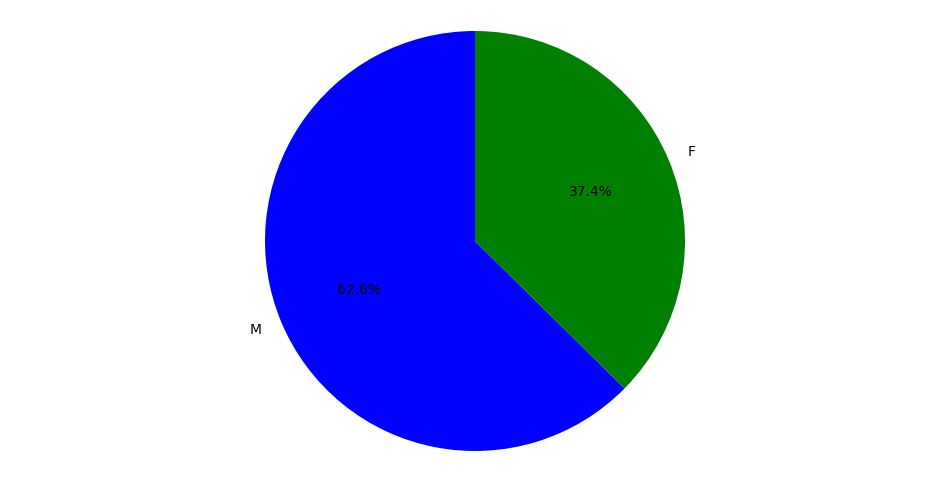

In [54]:
# Exploring EDA Variables 
# What is the gender distribution like among the policyholders?



g_counts = lifeinsurance_df['Gender'].value_counts()

plt.figure(figsize=(12,6))
plt.pie(g_counts, labels=g_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
plt.axis('equal')  # This ensures the pie chart is circular.
plt.show()


#### Observations:
- Most of the policyholders are male. Understanding the gender distribution is always crucial for our analysis so we can tailor insurance policy according to demographic needs.

In [55]:
# Extract Year, Month, and Date
lifeinsurance_df['Birth_Year'] = lifeinsurance_df['Birth_Date'].dt.year
lifeinsurance_df['Birth_Month'] = lifeinsurance_df['Birth_Date'].dt.month
lifeinsurance_df['Birth_Day'] = lifeinsurance_df['Birth_Date'].dt.day

In [56]:
# Explore Month, Year and Day 
def define_generation(year):
    if year <= 1945:
        return 'Silent Generation'
    elif year <= 1964:
        return 'Baby Boomers'
    elif year <= 1980:
        return 'Generation X'
    elif year <= 1996:
        return 'Millennials'
    elif year <= 2012:
        return 'Generation Z'
    else:
        return 'Generation Alpha'
    
lifeinsurance_df['Generation'] = lifeinsurance_df['Birth_Year'].apply(define_generation)

### Observation: 
- Boomers constitutes the largest segment of lifeinsurance policyholders.

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\2773472767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lifeinsurance_df, x='Generation', order=lifeinsurance_df['Generation'].value_counts().index, palette='coolwarm')


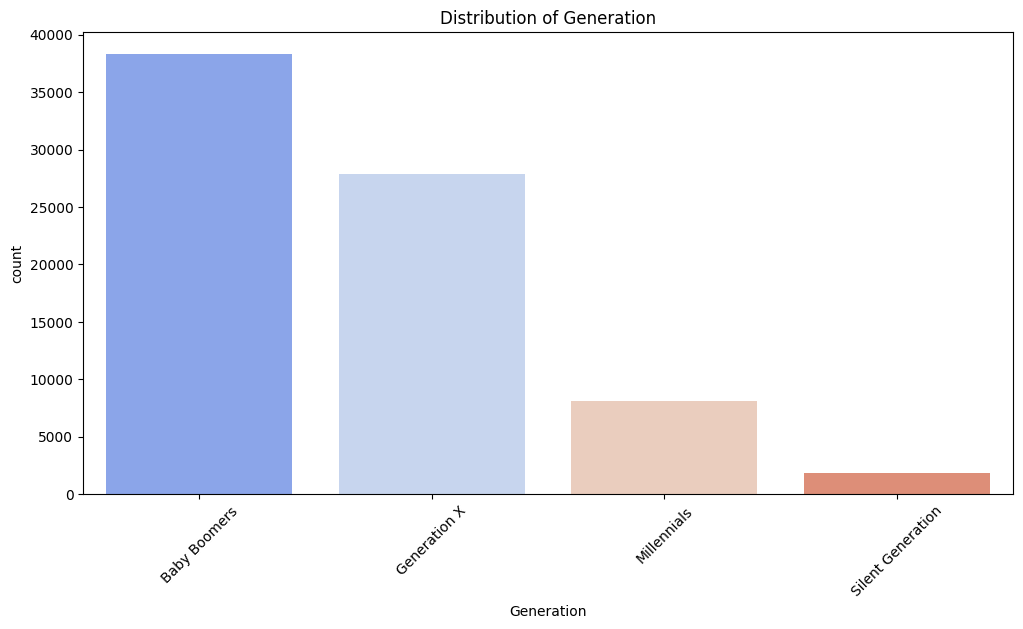

In [57]:
# Which generation constitutes the largest segment of life insurance policyholders?

plt.figure(figsize=(12,6))
sns.countplot(data=lifeinsurance_df, x='Generation', order=lifeinsurance_df['Generation'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Generation')
plt.show()

### Observation: 
- One of the primary reasons I wanted to add the 'Month' column was to see: What month were the most policyholders born in? Do people born during certain seasons buy more life insurance policies?"

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\1513325887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lifeinsurance_df, y='Month', palette='coolwarm')


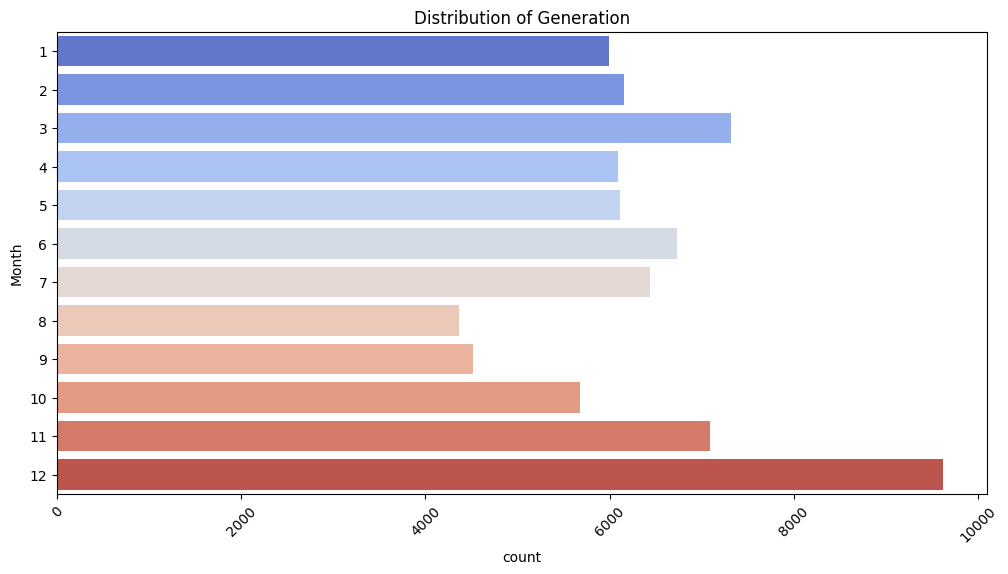

In [58]:
# Which birth month has the most policy holders?

plt.figure(figsize=(12,6))
sns.countplot(data=lifeinsurance_df, y='Month', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Generation')
plt.show()

#### Observtion:
- By examining the distribution of the time differences, we can observe whether a policy that are issued are concentrated around the birth date or if there is a more varied pattern. Based on the below distribution, we can observed that most of the policy are bought later in life.

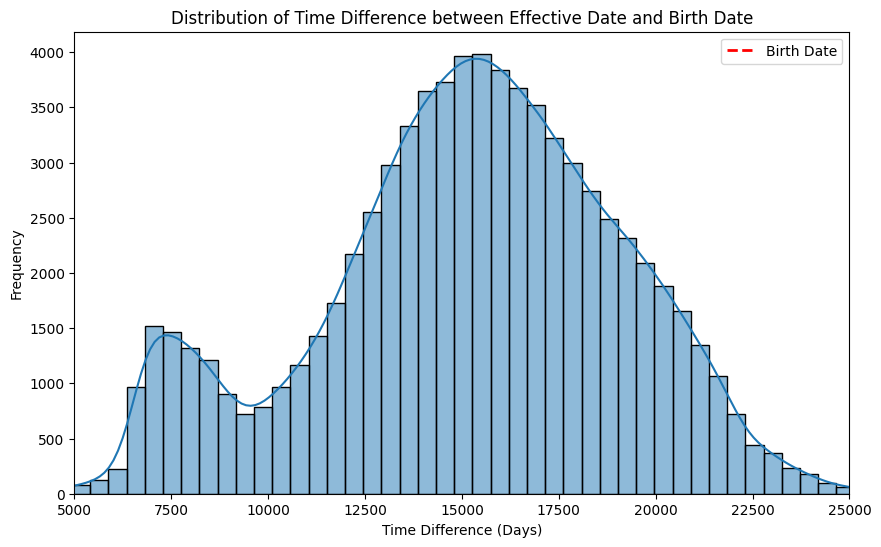

In [59]:
# Calculate time difference between Effective_Date and Birth_Date


lifeinsurance_df['Time_Difference'] = (lifeinsurance_df['Effecitive_Date'] - lifeinsurance_df['Birth_Date']).dt.days

# Plot the distribution of time difference
plt.figure(figsize=(10, 6))
sns.histplot(data=lifeinsurance_df, x='Time_Difference', bins=50, kde=True)
plt.title('Distribution of Time Difference between Effective Date and Birth Date')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Birth Date')
plt.xlim(5000, 25000)  # Set x-axis limits
plt.legend()
plt.show()

##### Observations:
- The distribution of the time difference seems to be left skewed. The majority of the policies were taken between 22 and 55 years after birth, giving us an insight that these were the common age for buying insurance. We can use insurance companies to detemine the best age ranges, a tool that can be helpful in marketing campaigns.

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\1100379619.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=monthly_counts.index, x=monthly_counts.values, palette='viridis')


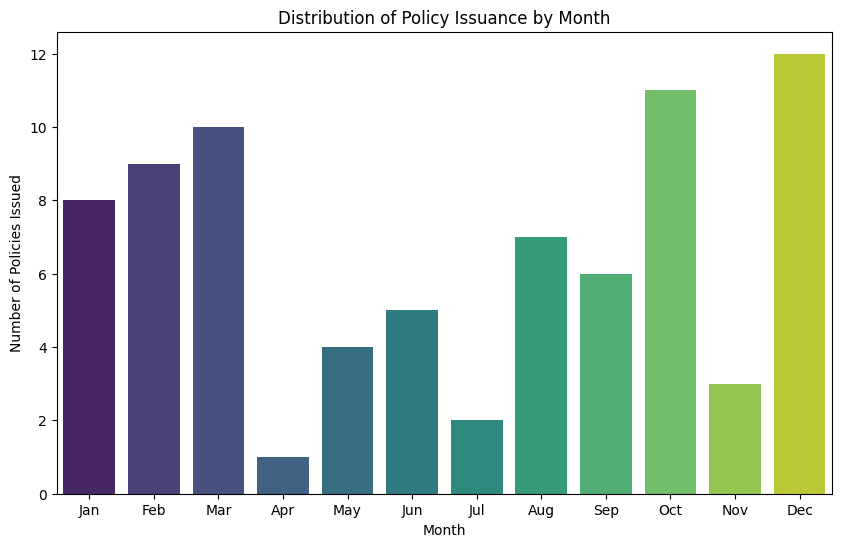

In [60]:
# Seasonal trend in Effective Date: 


# Analyze seasonal trends in Effective_Date
lifeinsurance_df['Eff_Month'] = lifeinsurance_df['Effecitive_Date'].dt.month
monthly_counts = lifeinsurance_df['Eff_Month'].value_counts().sort_index()

# Plot the distribution of Effective_Date across months
plt.figure(figsize=(10, 6))
sns.barplot(y=monthly_counts.index, x=monthly_counts.values, palette='viridis')
plt.title('Distribution of Policy Issuance by Month')
plt.xlabel('Month')
plt.ylabel('Number of Policies Issued')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### Observations: 
- Mostof the plots shows that policies are issued during winter months. This could be explained that most business choose is due to finalize insurance needs before the tax season. It also is the Q1 of the year, and it could help them explain how to allocate their resources for efficiently.

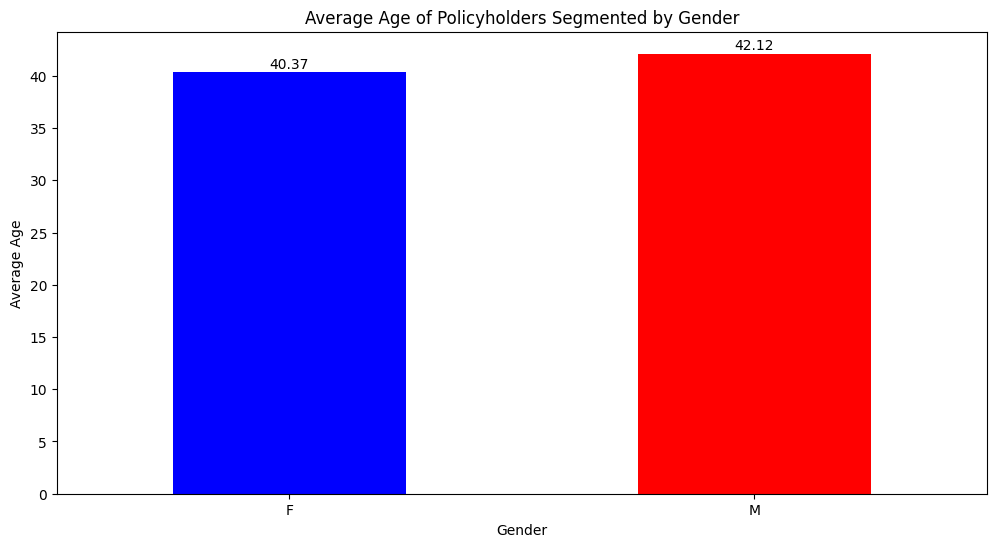

In [61]:
# At what age, are most of the people deciding to buying life insurance?


lifeinsurance_df['Age'] = (lifeinsurance_df['Effecitive_Date'] - lifeinsurance_df['Birth_Date']).dt.days / 365

# Calculate average age by gender
avg_age = lifeinsurance_df.groupby('Gender')['Age'].mean()

# Plot the bar chart
plt.figure(figsize=(12, 6))
avg_age.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Age of Policyholders Segmented by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add labels for the average age values on top of each bar
for i, v in enumerate(avg_age):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.show()

#### Observations: 
- For both men and women, the early 40s are the typical age to purchase life insurance when it comes to gender distributi

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\982794536.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=lifeinsurance_df['Capital'], color='red')


Text(0.5, 1.0, 'Distribution of the Capital')

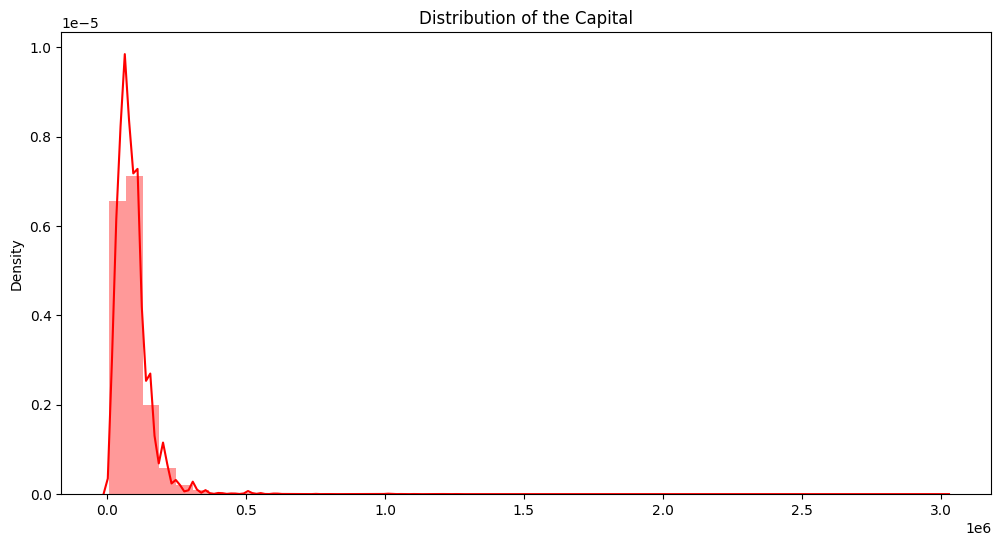

In [62]:
# Distribution of the Capital 
plt.figure(figsize=(12,6))
sns.distplot(x=lifeinsurance_df['Capital'], color='red')
plt.title('Distribution of the Capital')


#### Observation: 
- The distribution of the capital is rightly skewed. This means the average capital is greater than the median

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\2132390808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Capital', data=lifeinsurance_df, palette='plasma')


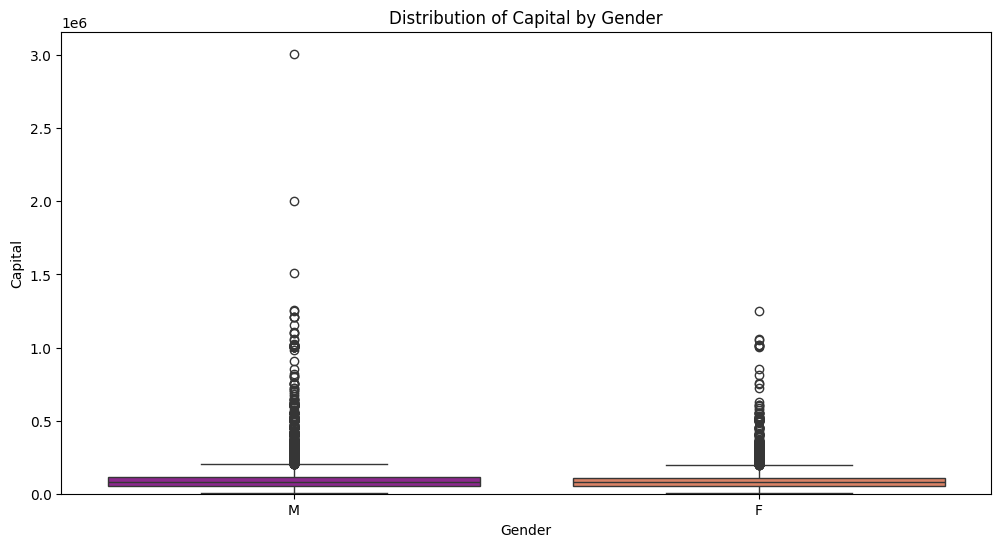

In [63]:
# Is there difference in the amount of Capital  based on gender?


# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Capital', data=lifeinsurance_df, palette='plasma')

# Set labels and title
plt.title('Distribution of Capital by Gender')
plt.xlabel('Gender')
plt.ylabel('Capital')

# Set y-axis limit to avoid outliers crowding the plot
plt.ylim(0, None)

# Show plot
plt.show()

### Distribution:
- There appears to be an equal distribution of capital by gender.Because life insurance services can be highly customized, there will inevitably be exceptions because every person's demands are different.

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\1350488982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Generation', y='Capital', data=lifeinsurance_df, palette='plasma')


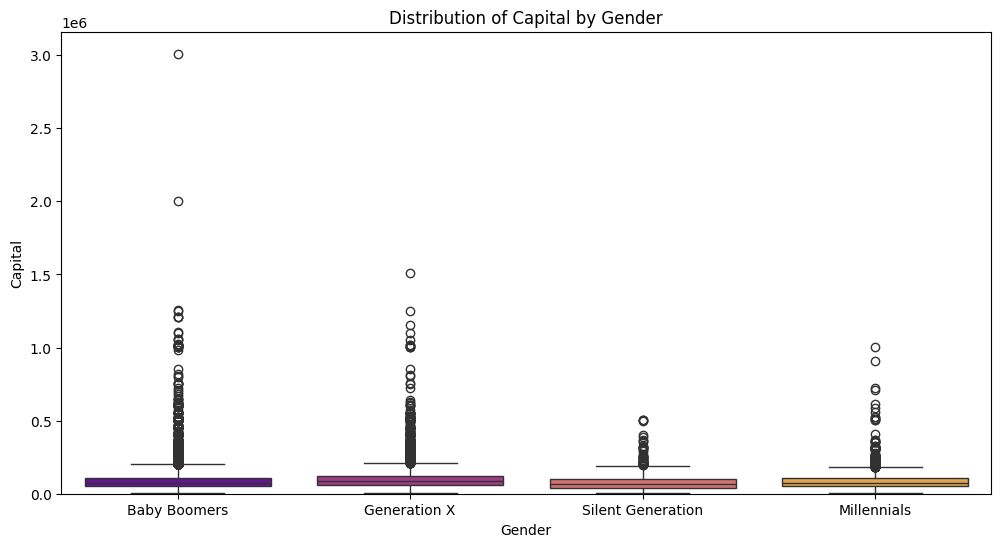

In [64]:
# Is there difference in the amount of Capital  based on generation?


# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='Capital', data=lifeinsurance_df, palette='plasma')

# Set labels and title
plt.title('Distribution of Capital by Gender')
plt.xlabel('Gender')
plt.ylabel('Capital')

# Set y-axis limit to avoid outliers crowding the plot
plt.ylim(0, None)

# Show plot
plt.show()

##### Observations:
- When it comes to generation, there is also some sort of equal distribution with extreme values. There will inevitably be outliers because life insurance services can be highly customized to meet the needs of each client.

### Why are we analyzing this?
-  By examining the renewal distribution, insurance companies can implement dynamic pricing strategies. Because of this, they are able to provide customized pricing and promote prompt renewals based on seasonal trends and patterns of consumer activity. These strategies, which encourage pricing transparency and dynamically adjust premium rates, enhance the value offer for policyholders. This guarantees competitive and equitable pricing according to market conditions and individual risk profiles. Also, it let us know in which quarter and month we can expect spike in renewal allowing the insurance company to prepare accordingly.



C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\482906730.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_renewal_count.index, y=month_renewal_count.values, palette='coolwarm')
C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\482906730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarter_renewal_count.index, y=quarter_renewal_count.values, palette='coolwarm')
C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\482906730.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_renewal_count.index, y=season_renewal

Text(0, 0.5, 'Number of Renewals')

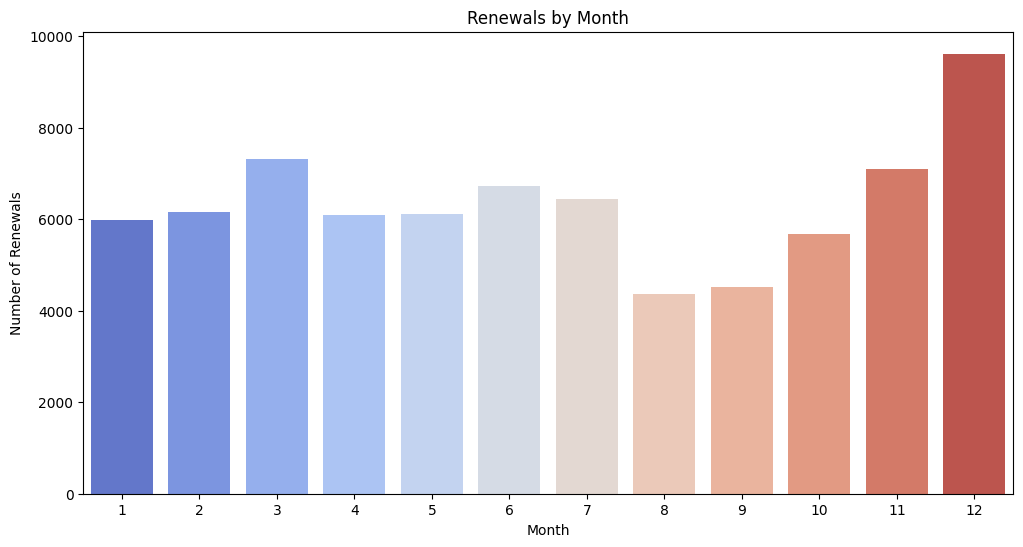

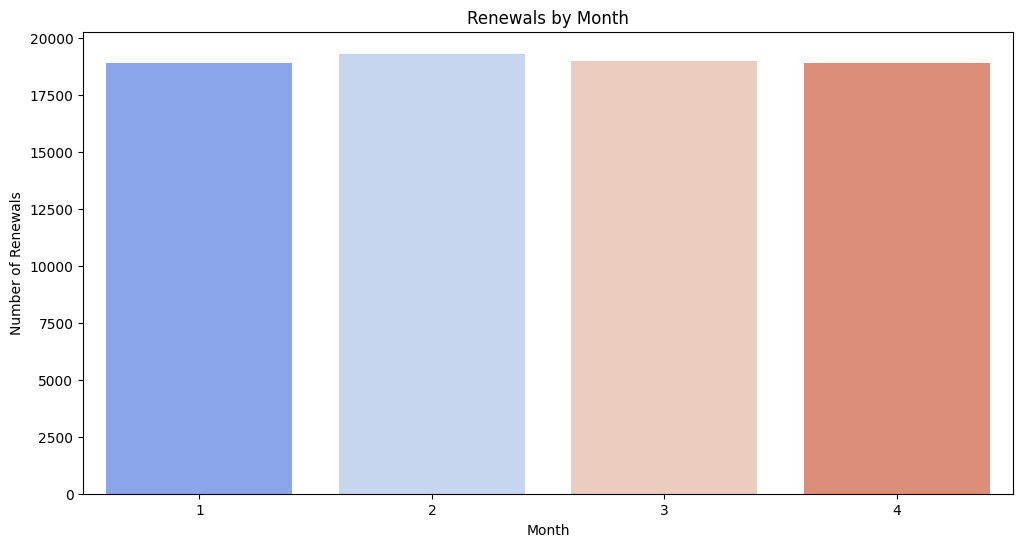

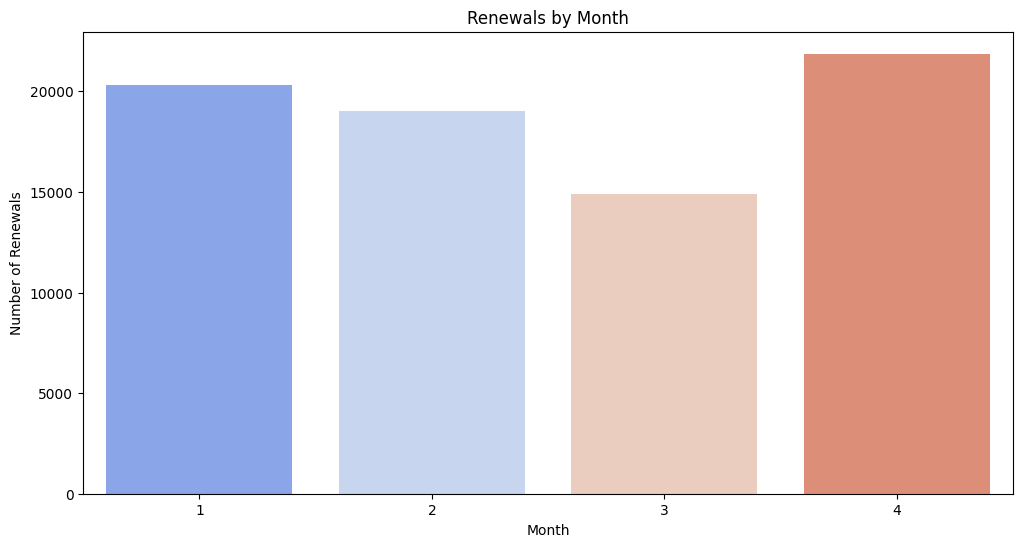

In [65]:
# Looking 'Renewal_Date' by seasons 


# Prepare the data for plotting

month_renewal_count = lifeinsurance_df['Month'].value_counts().sort_index()
quarter_renewal_count = lifeinsurance_df['r'].value_counts().sort_index()
season_renewal_count = lifeinsurance_df['s'].value_counts().sort_index()

# Plot the distribution of renewals by Month
plt.figure(figsize=(12,6))
sns.barplot(x=month_renewal_count.index, y=month_renewal_count.values, palette='coolwarm')
plt.title('Renewals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Renewals')



# Plot the distribution of renewals by Age-quarter of the insured at the time of renewa
plt.figure(figsize=(12,6))
sns.barplot(x=quarter_renewal_count.index, y=quarter_renewal_count.values, palette='coolwarm')
plt.title('Renewals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Renewals')

# Plotting the distribution of the renewals by Season
plt.figure(figsize=(12,6))
sns.barplot(x=season_renewal_count.index, y=season_renewal_count.values, palette='coolwarm')
plt.title('Renewals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Renewals')

### Observations:
- Renewals by month: The graph shows a propensity for certain months to have a higher number of renewals than others. December, the month before the year ends, can see a noticeable rise in renewals. Policy and financial cycles could be the cause of the increase.
- Renewals by Aging Quarter: The Fourth Quarter has the highest amount of renewals based on the end cycle of the previous year.
- Renewals by Season: Winter exhibits the greatest renewal cycle, which is consistent with the previous two graphs.

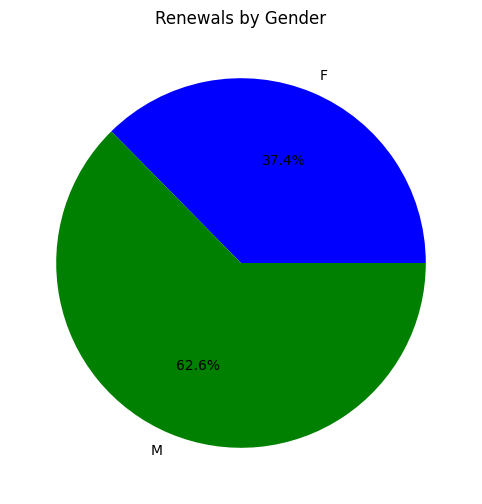

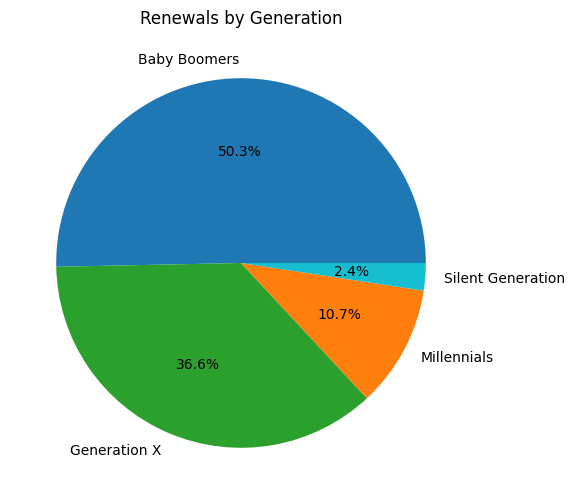

In [26]:
# Demographic Analysis of Renewal Date by Gender and different generation

renewal_bygender = lifeinsurance_df.groupby('Gender').size()
renewal_bygeneration = lifeinsurance_df.groupby('Generation').size()

# Which gender has the highest number of renewal?
plt.figure(figsize=(12,6))
plt.pie(renewal_bygender.values, labels=renewal_bygender.index, autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Renewals by Gender')
plt.show()



# Which generation has the highest number of renewal?
plt.figure(figsize=(12,6))

# Define colors similar to blue and green
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#17becf', '#8c564b']

plt.pie(renewal_bygeneration.values, labels=renewal_bygeneration.index, autopct='%1.1f%%', colors=colors)
plt.title('Renewals by Generation')
plt.show()

#### Observations: 
-  Males account for twice as much of the gender distribution in renewal as females. Because men make up the majority of policy holders, this makes sense. The majority of life insurance policies are being renewed by boomers, then by X in terms of generation. This may be explained by the age difference and the different requirements that arise with aging in humans.


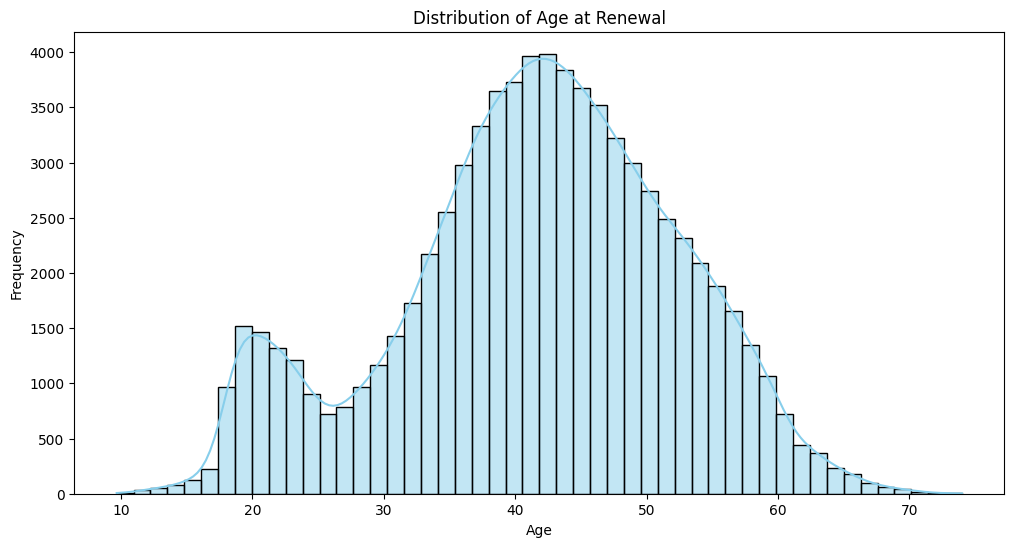

In [27]:
# Distribution of the 'Age' at the time of renewal date
# The distribution of the Age follows a right skewed distribution.


plt.figure(figsize=(12, 6))
sns.histplot(x=lifeinsurance_df['Age'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Age at Renewal')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\1692153571.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')


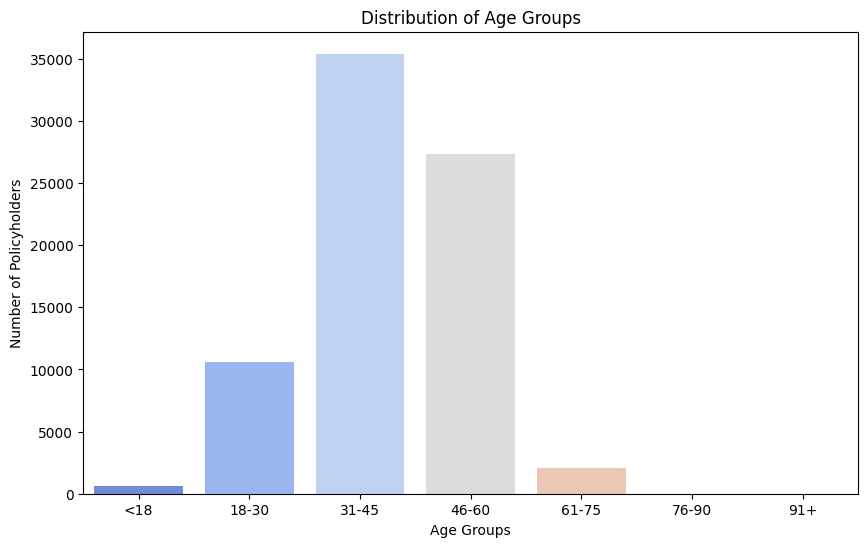

In [28]:
# Looking at the age groups at renewal by bins

# Define age groups

# Define age groups
bins = [0, 18, 30, 45, 60, 75, 90, 105]
labels = ['<18', '18-30', '31-45', '46-60', '61-75', '76-90', '91+']
lifeinsurance_df['Age_Group'] = pd.cut(lifeinsurance_df['Age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age group
age_group_counts = lifeinsurance_df['Age_Group'].value_counts().sort_index()

# Plotting the distribution of age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Policyholders')
plt.show()

#### Observations:
- Most the policy holders are at renewal are between 31-45 and 46-60. 

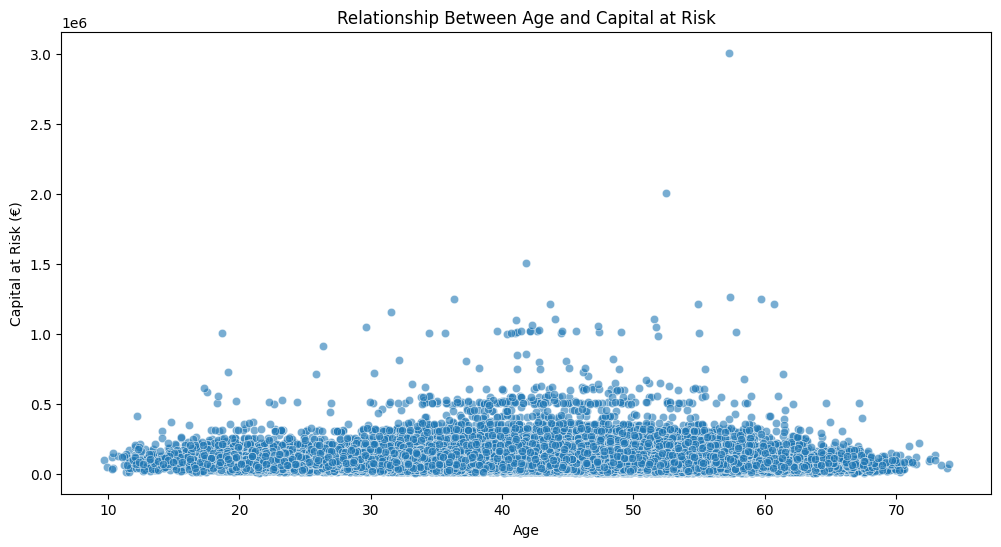

In [29]:
# Is there a relationship between Age and Capital?

# Age and Capital Relationship

plt.figure(figsize=(12,6))
sns.scatterplot(data=lifeinsurance_df, x='Age', y='Capital', alpha=0.6)
plt.title('Relationship Between Age and Capital at Risk')
plt.xlabel('Age')
plt.ylabel('Capital at Risk (€)')
plt.show()

Text(0.5, 1.0, 'Distribution of t')

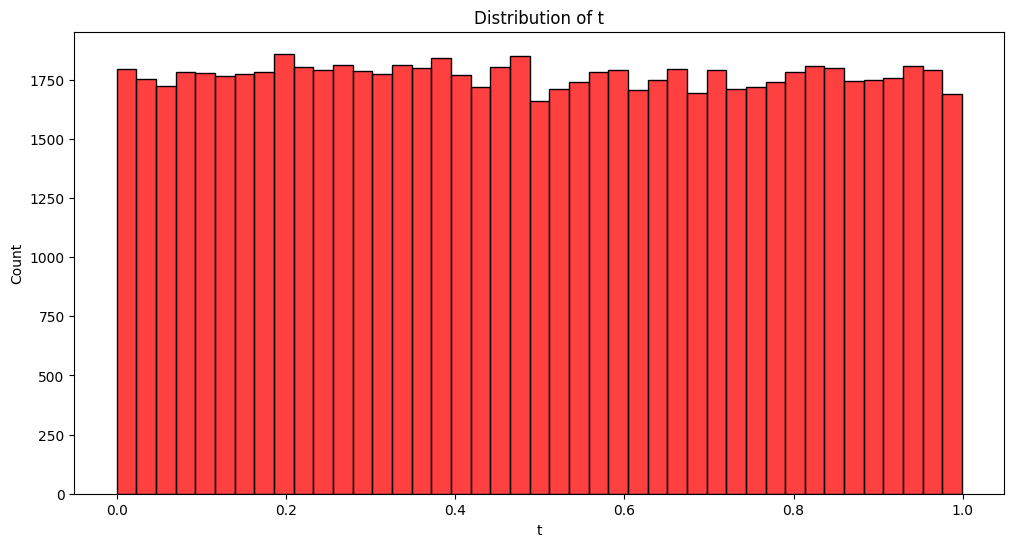

In [68]:
# Distribution of t - fractional age in years of the insured at the moment of the 'Renewal Date'

plt.figure(figsize=(12,6))
sns.histplot(x=lifeinsurance_df['t'], color='red')
plt.title('Distribution of t')

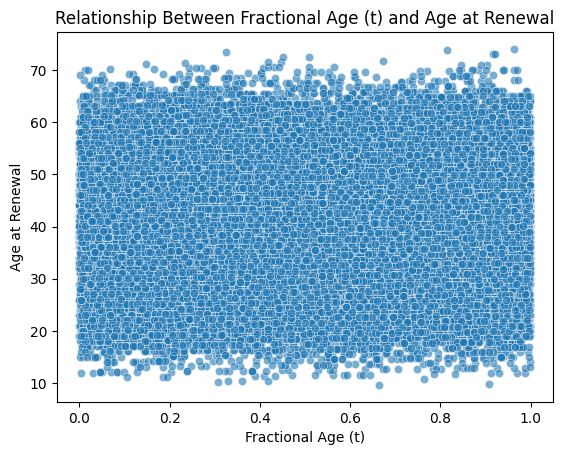

In [32]:
# Relationship between t and Age

sns.scatterplot(data=lifeinsurance_df, x='t', y='Age', alpha=0.6)
plt.title('Relationship Between Fractional Age (t) and Age at Renewal')
plt.xlabel('Fractional Age (t)')
plt.ylabel('Age at Renewal')
plt.show()

##### Observations: 
-  There is a weak correlation between age and capital at risk. This also seems to hold true for fractional age (t) and age at renewal.

C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\1967910720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_category_counts.index, y=t_category_counts.values, palette="coolwarm")


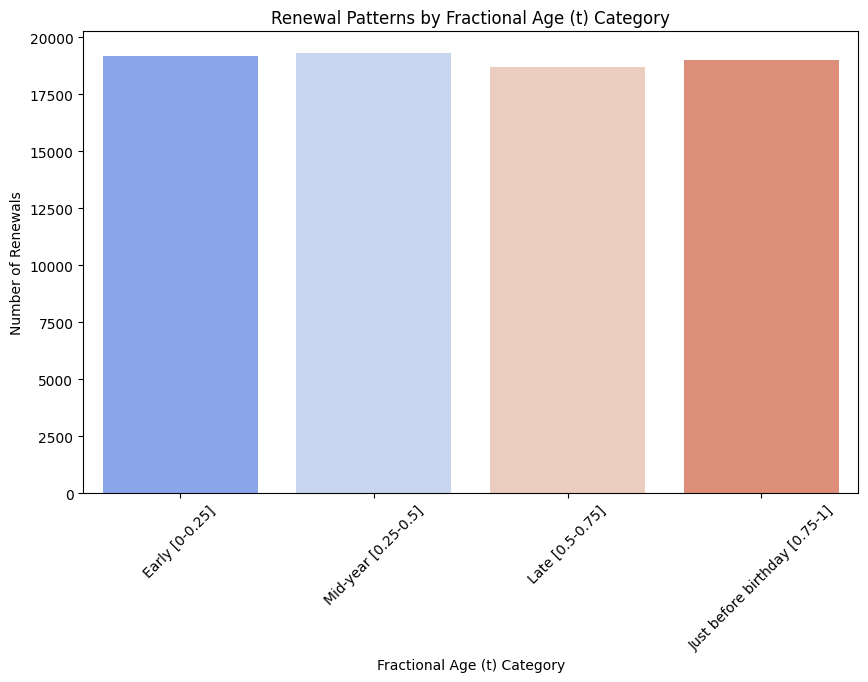

In [33]:
# Are policy renewals more common at specific times of the year relative to policyholders' birthdays?


t_bins = [0, 0.25, 0.5, 0.75, 1]
t_labels = ['Early [0-0.25]', 'Mid-year [0.25-0.5]', 'Late [0.5-0.75]', 'Just before birthday [0.75-1]']
lifeinsurance_df['t_Category'] = pd.cut(lifeinsurance_df['t'], bins=t_bins, labels=t_labels, right=False)

# Counting the number of renewals in each category
t_category_counts = lifeinsurance_df['t_Category'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=t_category_counts.index, y=t_category_counts.values, palette="coolwarm")
plt.title('Renewal Patterns by Fractional Age (t) Category')
plt.xlabel('Fractional Age (t) Category')
plt.ylabel('Number of Renewals')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of Renewal Seasonal Pattern')

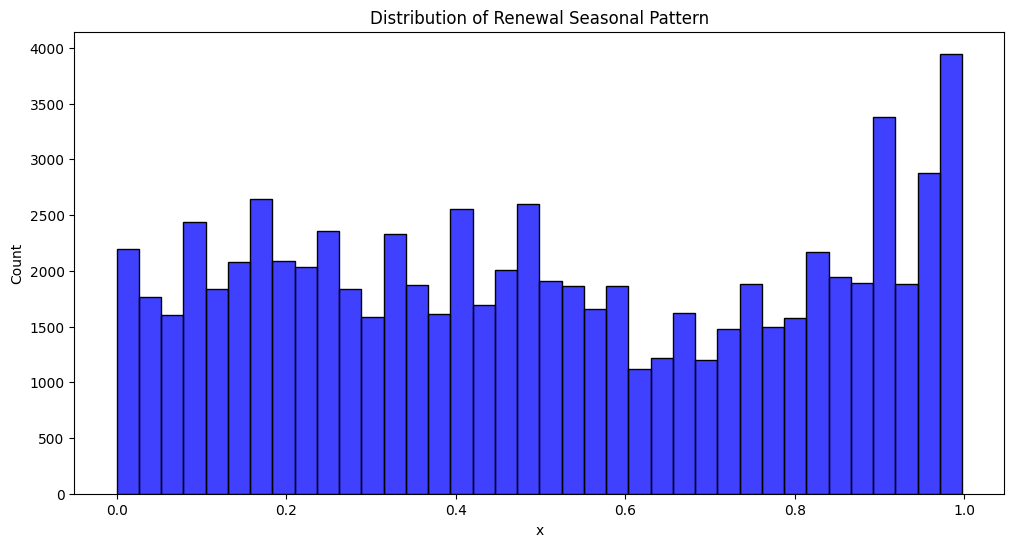

In [34]:
# Is there a particular time of year when policy renewals are most common? 


plt.figure(figsize=(12,6))
sns.histplot(x=lifeinsurance_df['x'],color='blue')
plt.title('Distribution of Renewal Seasonal Pattern')

### Observations:
-  There is are particular distinct pattern on the above plots

C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\587628532.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=lifeinsurance_df['Age_actuarial_quarter'])


Text(0.5, 1.0, 'Distribution of the Actuarial Age')

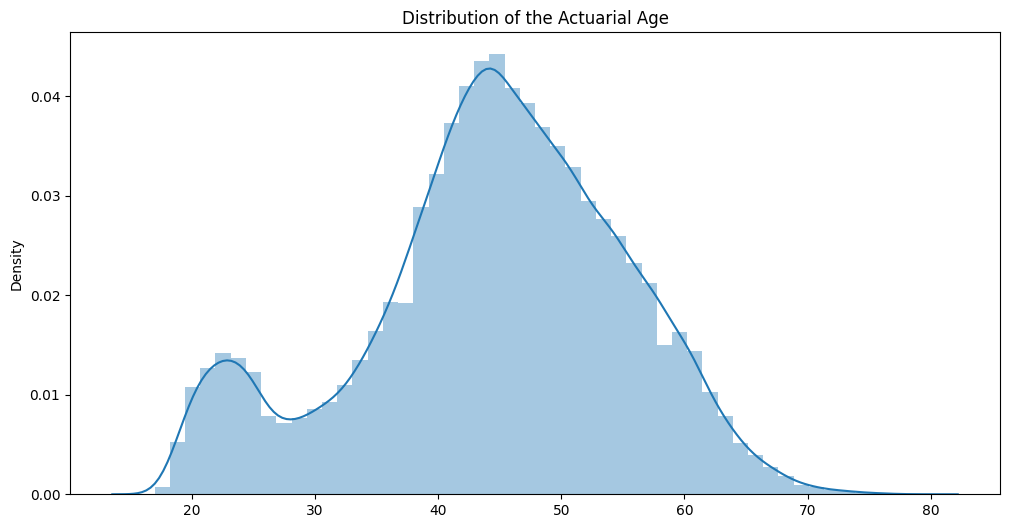

In [35]:
# Distribution of the 'Age_actuarial_quarter'

# Histogram 
plt.figure(figsize=(12,6))
sns.distplot(x=lifeinsurance_df['Age_actuarial_quarter'])
plt.title('Distribution of the Actuarial Age')

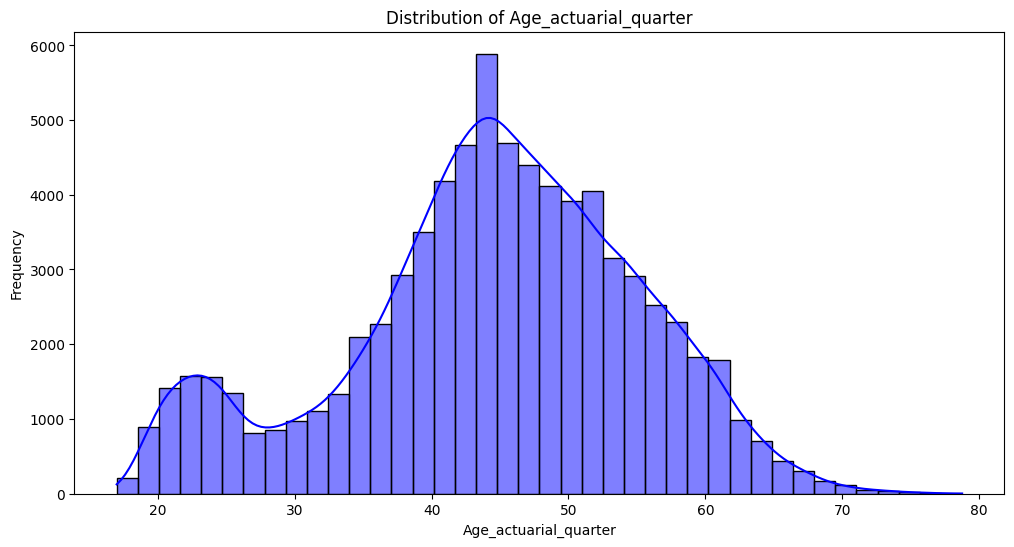

In [36]:
# Actuarial Age by demographics


# Plotting the distribution of Age_actuarial_quarter using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(lifeinsurance_df['Age_actuarial_quarter'], bins=40, kde=True, color='blue')
plt.title('Distribution of Age_actuarial_quarter')
plt.xlabel('Age_actuarial_quarter')
plt.ylabel('Frequency')
plt.show()

##### Observations: 
- The data have a right-skewed distribution with a greater tail on the right side. Based on this pattern, the majority of policyholders fall within the lower to medium age group. Although there are fewer elderly people, their ages differ greatly

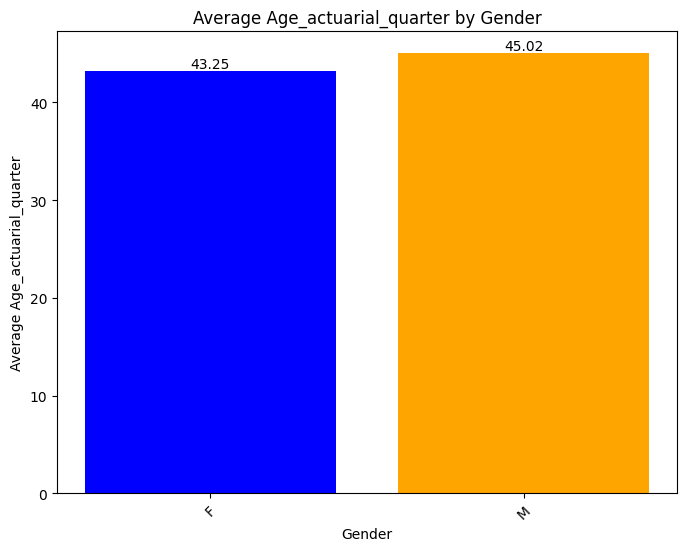

In [37]:
# Average Age_actuarial_quarter age for male and female

avg_actage = lifeinsurance_df.groupby('Gender')['Age_actuarial_quarter'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(x=avg_actage.index, height=avg_actage.values, color=['blue', 'orange'])

plt.title('Average Age_actuarial_quarter by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age_actuarial_quarter')
plt.xticks(rotation=45)  # In case the gender labels are longer

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

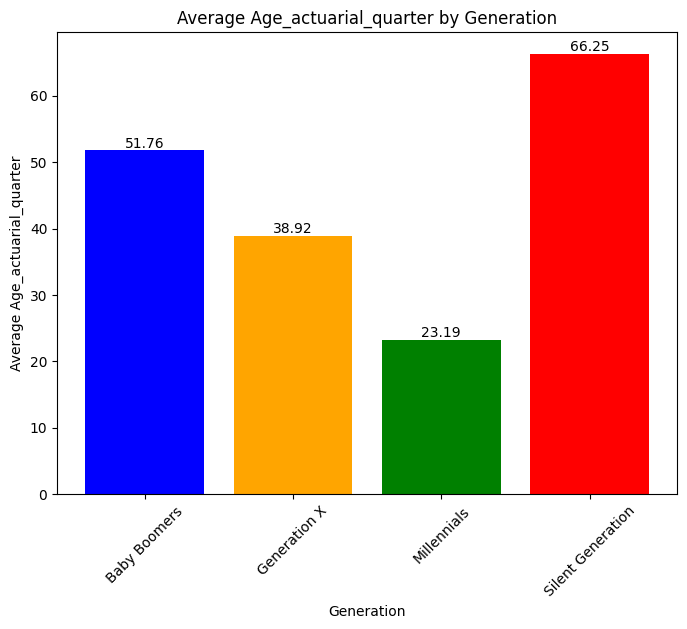

In [38]:
# Average Age_actuarial_quarter age based on Generation



avg_actage = lifeinsurance_df.groupby('Generation')['Age_actuarial_quarter'].mean()

plt.figure(figsize=(8, 6))
# Note: You might want to adjust the color list to match the number of generations in your dataset
colors_for_generations = ['blue', 'orange', 'green', 'red', 'purple']  # Example for 5 generations
bars = plt.bar(x=avg_actage.index, height=avg_actage.values, color=colors_for_generations)

plt.title('Average Age_actuarial_quarter by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Age_actuarial_quarter')
plt.xticks(rotation=45)  # Adjust rotation if needed

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


#### Observations:
- Gender-wise, early 40s is the typical age. But it differs when we break it down by age.

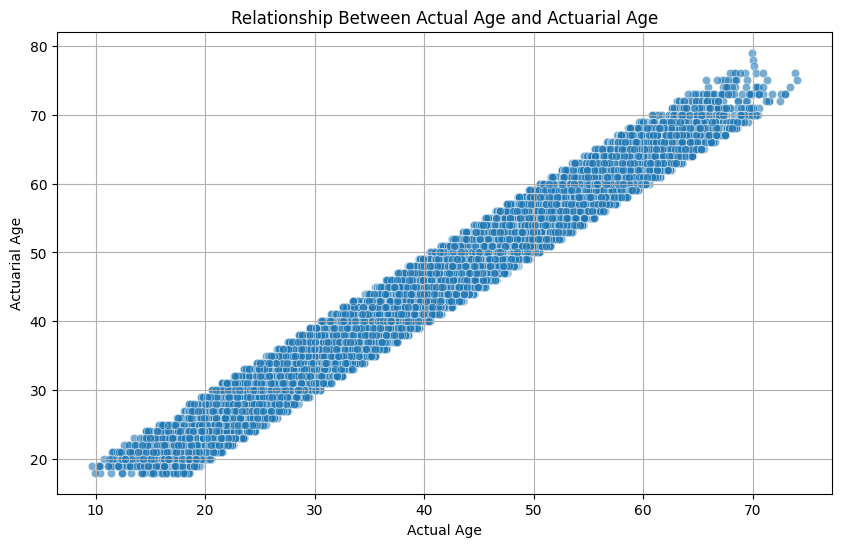

In [39]:
# Relationship between 'Age' and 'Age_actuarial_quarter'



plt.figure(figsize=(10, 6))
sns.scatterplot(data=lifeinsurance_df, x='Age', y='Age_Actuarial', alpha=0.6)

plt.title('Relationship Between Actual Age and Actuarial Age')
plt.xlabel('Actual Age')
plt.ylabel('Actuarial Age')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\3452237781.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_capital_by_age_group = lifeinsurance_df.groupby('Age_Group')['Capital'].mean()
C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\3452237781.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_capital_by_age_group.index, y=average_capital_by_age_group.values, palette="coolwarm")


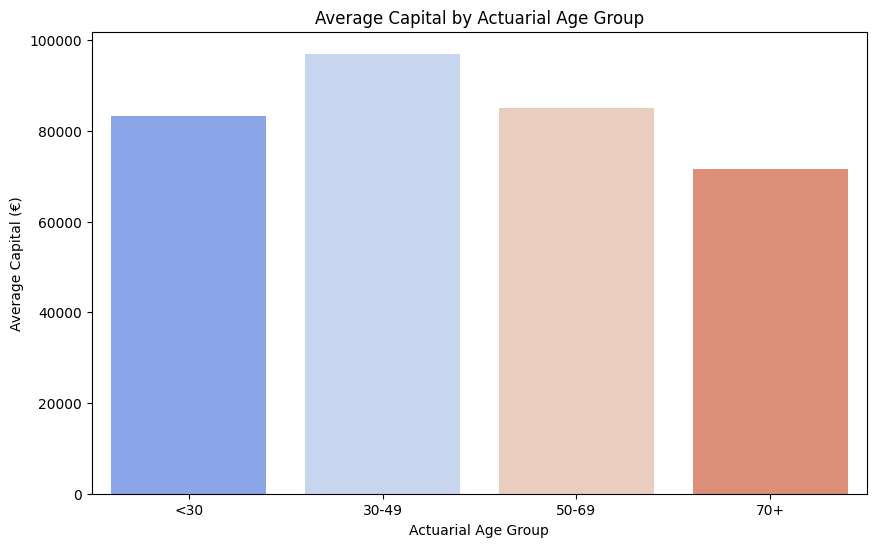

In [40]:
# Looking actuarial age bins and capital


bins = [0, 30, 50, 70, 100]  
labels = ['<30', '30-49', '50-69', '70+']
lifeinsurance_df['Age_Group'] = pd.cut(lifeinsurance_df['Age_Actuarial'], bins=bins, labels=labels, right=False)

# Calculating average Capital by Age Group
average_capital_by_age_group = lifeinsurance_df.groupby('Age_Group')['Capital'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_capital_by_age_group.index, y=average_capital_by_age_group.values, palette="coolwarm")
plt.title('Average Capital by Actuarial Age Group')
plt.xlabel('Actuarial Age Group')
plt.ylabel('Average Capital (€)')
plt.show()

##### Observation: 
- The actuarial age varies. There is a strong linear relationship between Age an Actuarial Age.

In [41]:
# Upload the mortality file 

mortality_df = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/life_insurance/data/e04b0f0f-e62e-4678-bedf-4841834f2962_Data.csv')


In [42]:
# id_vars- columns which we do not want to melt. 
id_vars = ['Country Name','Country Code']

# Use pd.met to transform the datasert
melt_df = pd.melt(mortality_df, id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                    var_name='Year', value_name='Value')

In [43]:
melt_df['Year'] = melt_df['Year'].str.extract('(\d{4})')

In [44]:
melt_df.drop(columns=['Country Name','Country Code'], inplace=True)

In [45]:
melt_df.head(5)

Series Name        Series Code  Year  \
0  Maternal mortality ratio (modeled estimate, pe...        SH.STA.MMRT  2000   
1  Maternal mortality ratio (national estimate, p...     SH.STA.MMRT.NE  2000   
2  Mortality caused by road traffic injury (per 1...     SH.STA.TRAF.P5  2000   
3  Mortality from CVD, cancer, diabetes or CRD be...     SH.DYN.NCOM.ZS  2000   
4  Mortality from CVD, cancer, diabetes or CRD be...  SH.DYN.NCOM.FE.ZS  2000   

  Value  
0     5  
1     4  
2  15.4  
3  13.7  
4   8.2

In [46]:
# Create a pivot table so our series can be our columns
pivot_df = melt_df.pivot_table(index=['Year'], columns='Series Name', values='Value', aggfunc='first').reset_index()


In [47]:
pivot_df.head(5)

Series Name  Year  \
0            2000   
1            2001   
2            2002   
3            2003   
4            2004   

Series Name Maternal mortality ratio (modeled estimate, per 100,000 live births)  \
0                                                            5                     
1                                                            5                     
2                                                            5                     
3                                                            5                     
4                                                            5                     

Series Name Maternal mortality ratio (national estimate, per 100,000 live births)  \
0                                                            4                      
1                                                            4                      
2                                                            3                      
3                                                            4                      
4                                                            5                      

Series Name Mortality caused by road traffic injury (per 100,000 population)  \
0                                                         15.4                 
1                                                         14.4                 
2                                                         13.6                 
3                                                         13.4                 
4                                                         11.7                 

Series Name Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)  \
0                                                         13.7                             
1                                                         13.3                             
2                                                         13.1                             
3                                                           13                             
4                                                         12.5                             

Series Name Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)  \
0                                                          8.2                                     
1                                                          8.1                                     
2                                                          7.8                                     
3                                                          7.8                                     
4                                                          7.4                                     

Series Name Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)  \
0                                                         19.3                                   
1                                                         18.8                                   
2                                                         18.5                                   
3                                                         18.3                                   
4                                                         17.7                                   

Series Name Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)  \
0                                                           ..                                                            
1                                                           ..                                                            
2                                                           ..                                                            
3                                                           ..                                                            
4                 

In [48]:
pivot_df.rename_axis(index=None, columns=None, inplace=True)

In [49]:
pivot_df.head(5)

Year Maternal mortality ratio (modeled estimate, per 100,000 live births)  \
0  2000                                                  5                     
1  2001                                                  5                     
2  2002                                                  5                     
3  2003                                                  5                     
4  2004                                                  5                     

  Maternal mortality ratio (national estimate, per 100,000 live births)  \
0                                                  4                      
1                                                  4                      
2                                                  3                      
3                                                  4                      
4                                                  5                      

  Mortality caused by road traffic injury (per 100,000 population)  \
0                                               15.4                 
1                                               14.4                 
2                                               13.6                 
3                                               13.4                 
4                                               11.7                 

  Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)  \
0                                               13.7                             
1                                               13.3                             
2                                               13.1                             
3                                                 13                             
4                                               12.5                             

  Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)  \
0                                                8.2                                     
1                                                8.1                                     
2                                                7.8                                     
3                                                7.8                                     
4                                                7.4                                     

  Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)  \
0                                               19.3                                   
1                                               18.8                                   
2                                               18.5                                   
3                                               18.3                                   
4                                               17.7                                   

  Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)  \
0                                                 ..                                                            
1                                                 ..                                                            
2                                                 ..                                                            
3                                                 ..                                                            
4                                                 ..                                                            

  Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)  \
0                                                 ..                                                                           
1                                                 ..                                                                           
2                       

In [50]:
columns_rename = {'Maternal mortality ratio (modeled estimate, per 100,000 live births':'MM_Ratio_ModelE_'}

In [51]:
# Rename the columns to make it more readable

short_names_dict = {
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)': 'MMR Modeled',
    'Maternal mortality ratio (national estimate, per 100,000 live births)': 'MMR National',
    'Mortality caused by road traffic injury (per 100,000 population)': 'Traffic Mortality',
    'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)': 'NCD Mortality 30-70%',
    'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)': 'NCD Mortality Female',
    'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)': 'NCD Mortality Male',
    'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)': 'Air Pollution Mortality',
    'Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)': 'Air Pollution Mortality Female',
    'Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)': 'Air Pollution Mortality Male',
    'Mortality rate attributed to unintentional poisoning (per 100,000 population)': 'Poisoning Mortality',
    'Mortality rate attributed to unintentional poisoning, female (per 100,000 female population)': 'Poisoning Mortality Female',
    'Mortality rate attributed to unintentional poisoning, male (per 100,000 male population)': 'Poisoning Mortality Male',
    'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)': 'Water/Sanitation Mortality',
    'Mortality rate, adult, female (per 1,000 female adults)': 'Adult Mortality Female',
    'Mortality rate, adult, male (per 1,000 male adults)': 'Adult Mortality Male',
    'Mortality rate, infant (per 1,000 live births)': 'Infant Mortality',
    'Mortality rate, infant, female (per 1,000 live births)': 'Infant Mortality Female',
    'Mortality rate, infant, male (per 1,000 live births)': 'Infant Mortality Male',
    'Mortality rate, neonatal (per 1,000 live births)': 'Neonatal Mortality',
    'Mortality rate, under-5 (per 1,000 live births)': 'Under-5 Mortality',
    'Mortality rate, under-5, female (per 1,000 live births)': 'Under-5 Mortality Female',
    'Mortality rate, under-5, male (per 1,000 live births)': 'Under-5 Mortality Male',
    'Suicide mortality rate (per 100,000 population)': 'Suicide Mortality',
    'Suicide mortality rate, female (per 100,000 female population)': 'Suicide Mortality Female',
    'Suicide mortality rate, male (per 100,000 male population)': 'Suicide Mortality Male'
}
pivot_df.rename(columns=short_names_dict, inplace=True)


In [52]:
pivot_df.columns

Index(['Year', 'MMR Modeled', 'MMR National', 'Traffic Mortality',
       'NCD Mortality 30-70%', 'NCD Mortality Female', 'NCD Mortality Male',
       'Air Pollution Mortality', 'Air Pollution Mortality Female',
       'Air Pollution Mortality Male', 'Poisoning Mortality',
       'Poisoning Mortality Female', 'Poisoning Mortality Male',
       'Water/Sanitation Mortality', 'Adult Mortality Female',
       'Adult Mortality Male', 'Infant Mortality', 'Infant Mortality Female',
       'Infant Mortality Male', 'Neonatal Mortality', 'Under-5 Mortality',
       'Under-5 Mortality Female', 'Under-5 Mortality Male',
       'Suicide Mortality', 'Suicide Mortality Female',
       'Suicide Mortality Male'],
      dtype='object')

In [53]:
pivot_df.dtypes

Year                              object
MMR Modeled                       object
MMR National                      object
Traffic Mortality                 object
NCD Mortality 30-70%              object
NCD Mortality Female              object
NCD Mortality Male                object
Air Pollution Mortality           object
Air Pollution Mortality Female    object
Air Pollution Mortality Male      object
Poisoning Mortality               object
Poisoning Mortality Female        object
Poisoning Mortality Male          object
Water/Sanitation Mortality        object
Adult Mortality Female            object
Adult Mortality Male              object
Infant Mortality                  object
Infant Mortality Female           object
Infant Mortality Male             object
Neonatal Mortality                object
Under-5 Mortality                 object
Under-5 Mortality Female          object
Under-5 Mortality Male            object
Suicide Mortality                 object
Suicide Mortalit

In [54]:

# Convert columns with object dtype to numeric, treating '..' as missing values (NaN)
for cols in pivot_df.columns:
    if pivot_df[cols].dtypes == 'object':
        pivot_df[cols] = pd.to_numeric(pivot_df[cols], errors='coerce')

In [55]:
pivot_df.dtypes

Year                                int64
MMR Modeled                       float64
MMR National                      float64
Traffic Mortality                 float64
NCD Mortality 30-70%              float64
NCD Mortality Female              float64
NCD Mortality Male                float64
Air Pollution Mortality           float64
Air Pollution Mortality Female    float64
Air Pollution Mortality Male      float64
Poisoning Mortality               float64
Poisoning Mortality Female        float64
Poisoning Mortality Male          float64
Water/Sanitation Mortality        float64
Adult Mortality Female            float64
Adult Mortality Male              float64
Infant Mortality                  float64
Infant Mortality Female           float64
Infant Mortality Male             float64
Neonatal Mortality                float64
Under-5 Mortality                 float64
Under-5 Mortality Female          float64
Under-5 Mortality Male            float64
Suicide Mortality                 

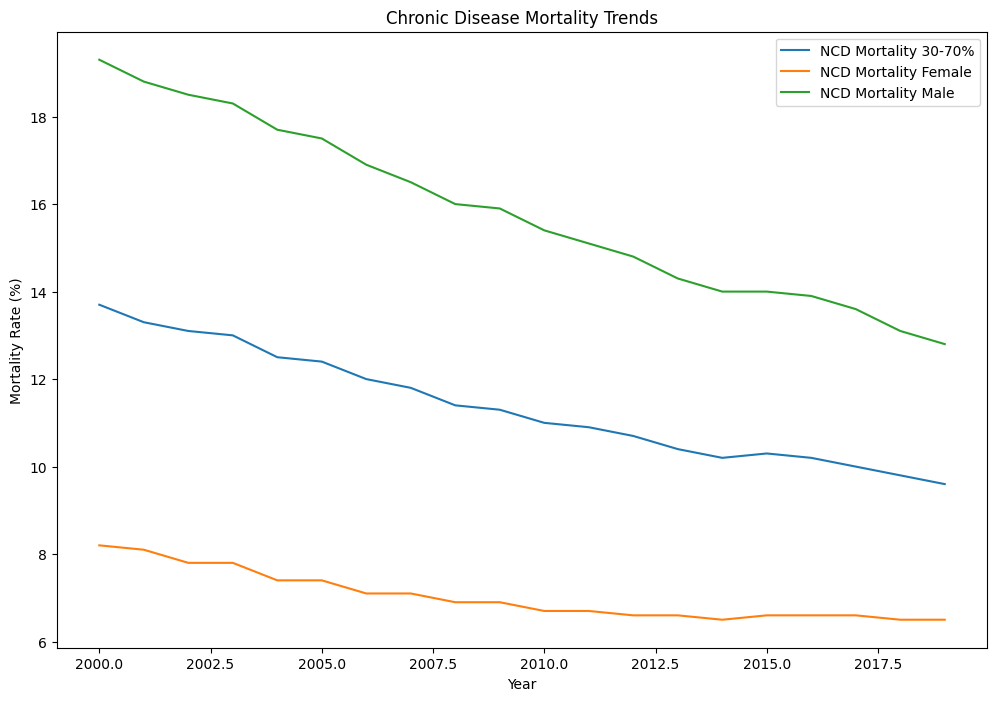

In [102]:
# Chronic Disease trends 


plt.figure(figsize=(12, 8))

# List of chronic disease indicators you want to plot
chronic_disease_indicators = ['NCD Mortality 30-70%', 'NCD Mortality Female', 'NCD Mortality Male']

for indicator in chronic_disease_indicators:
    sns.lineplot(data=pivot_df, x='Year', y=indicator, label=indicator)

plt.title('Chronic Disease Mortality Trends')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Year')
plt.legend()
plt.show()

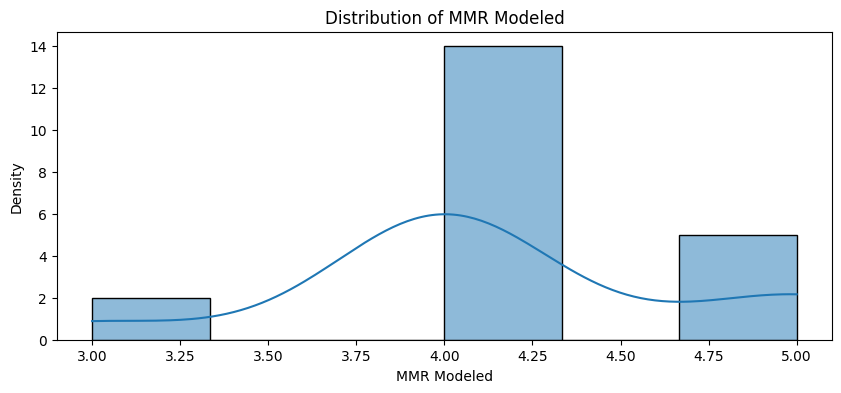

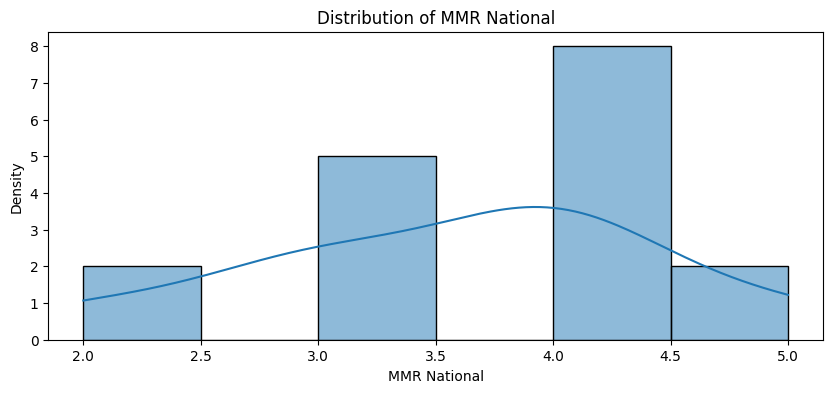

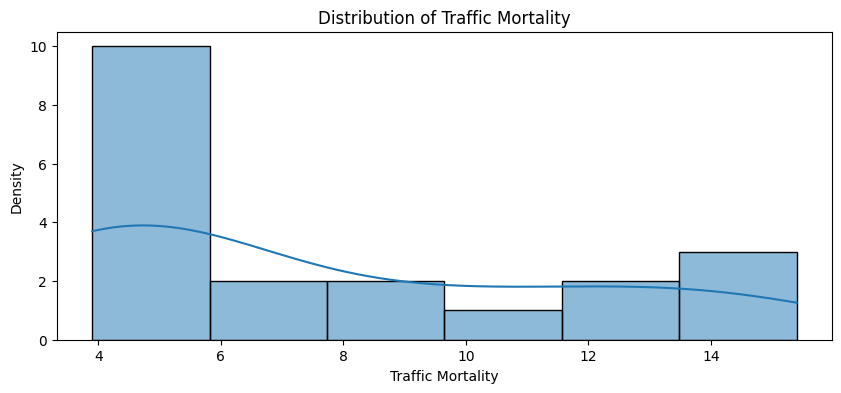

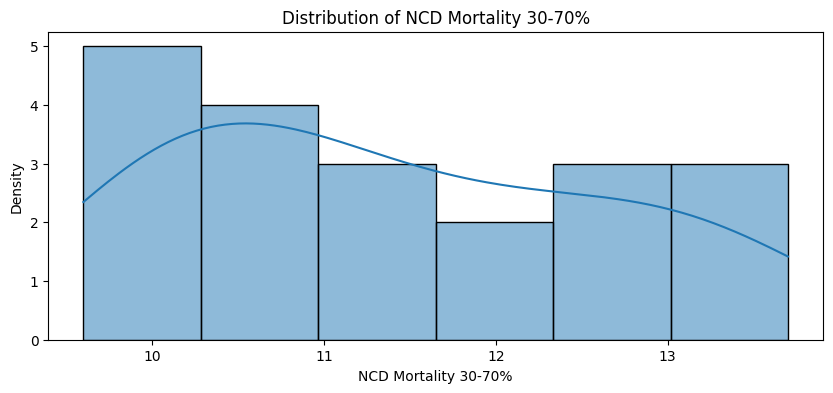

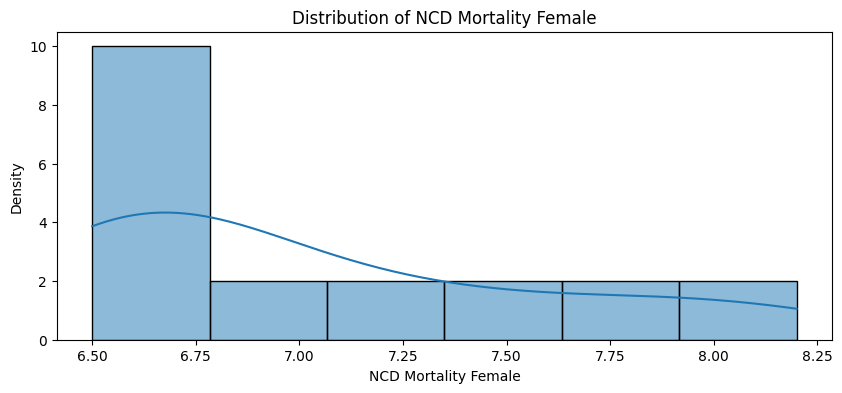

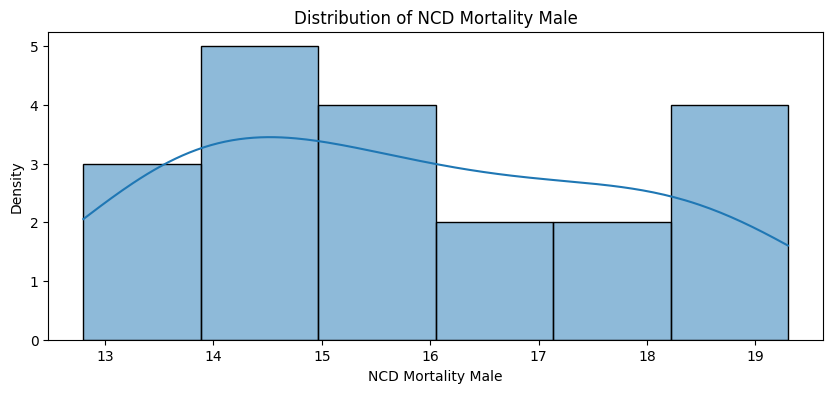

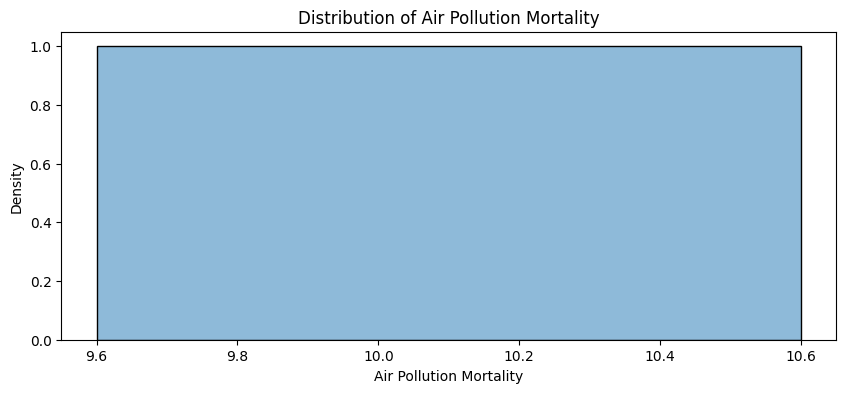

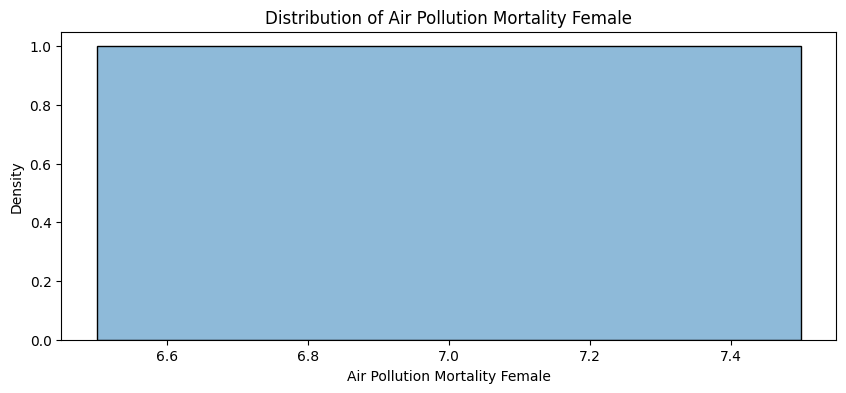

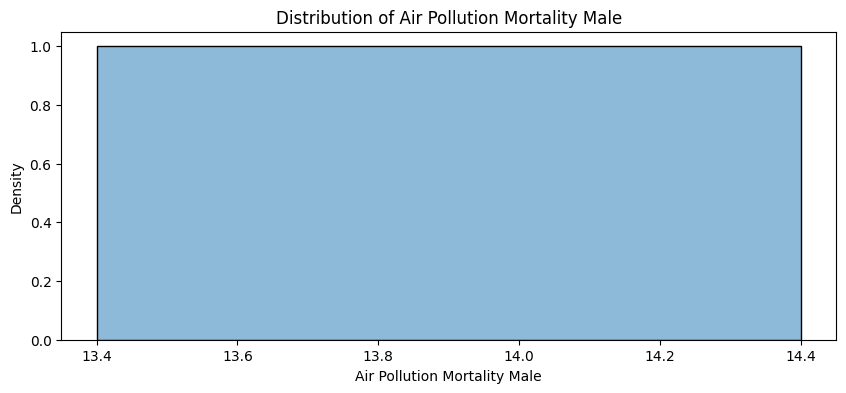

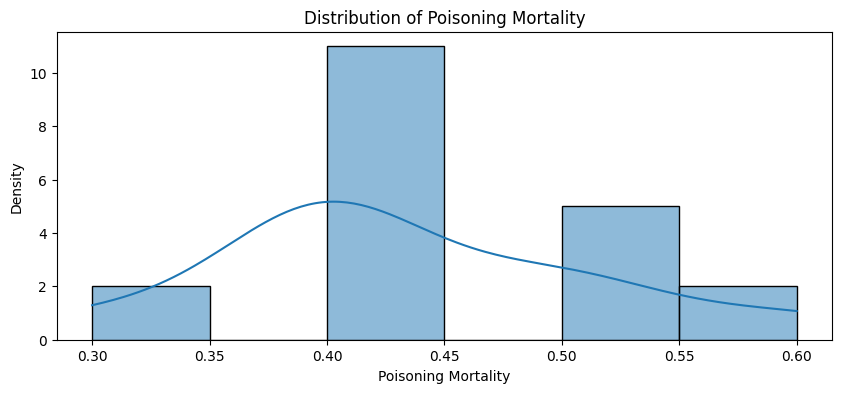

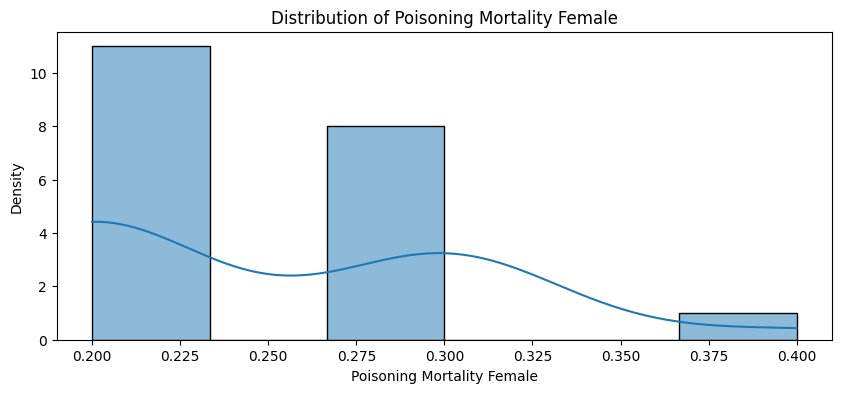

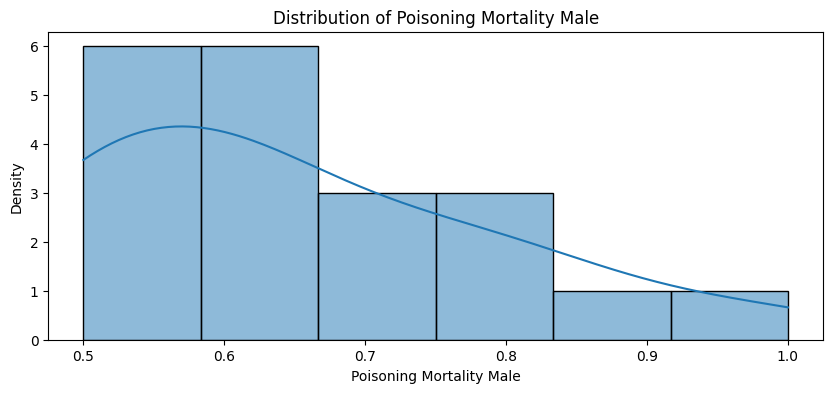

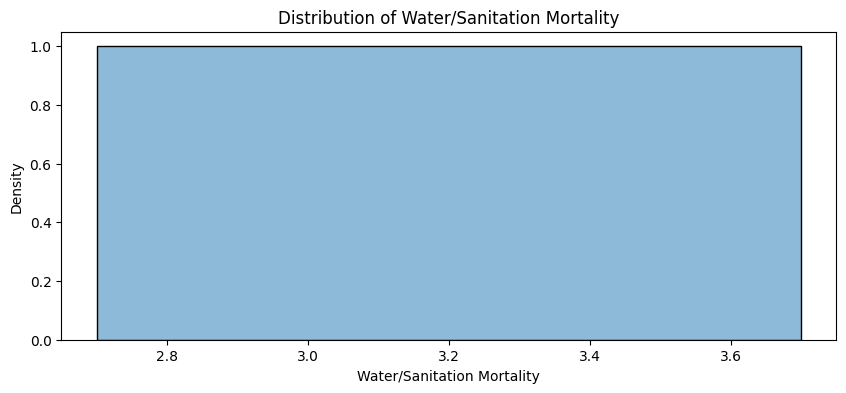

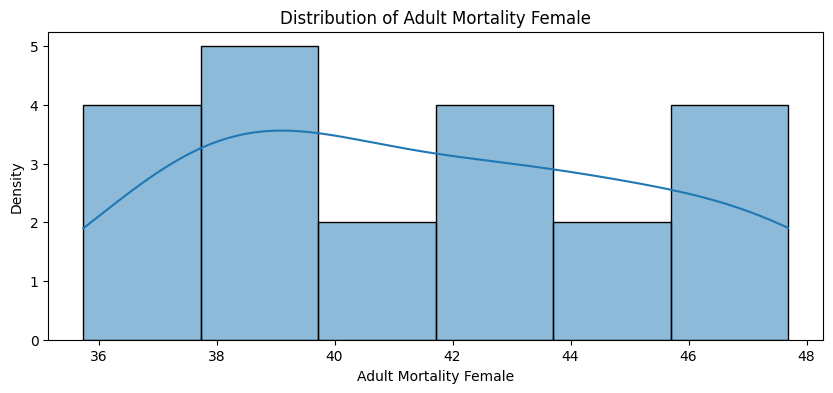

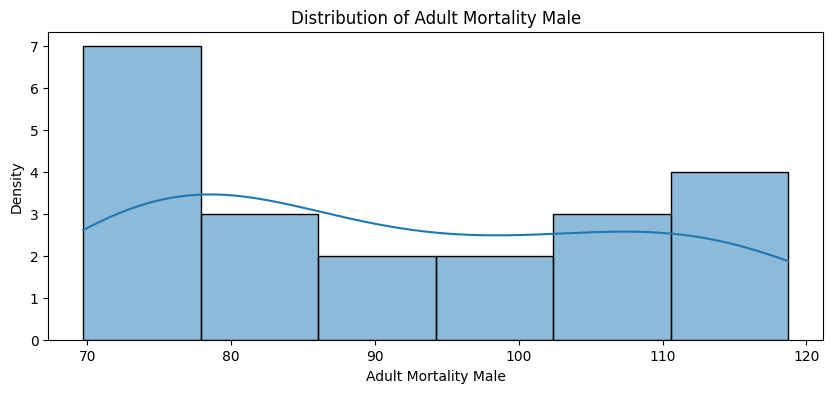

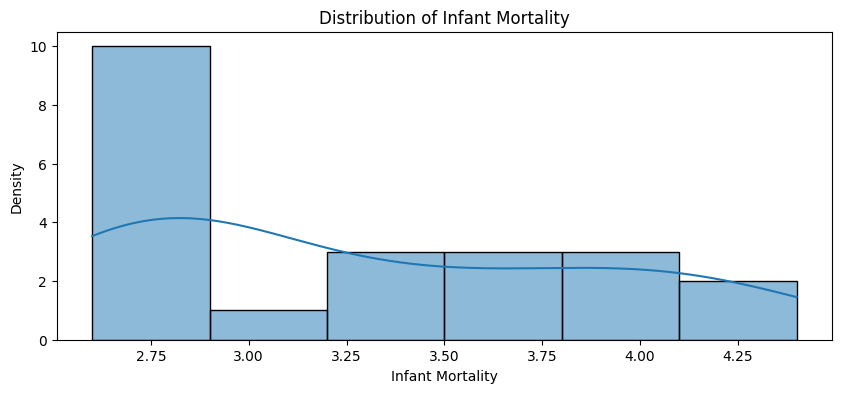

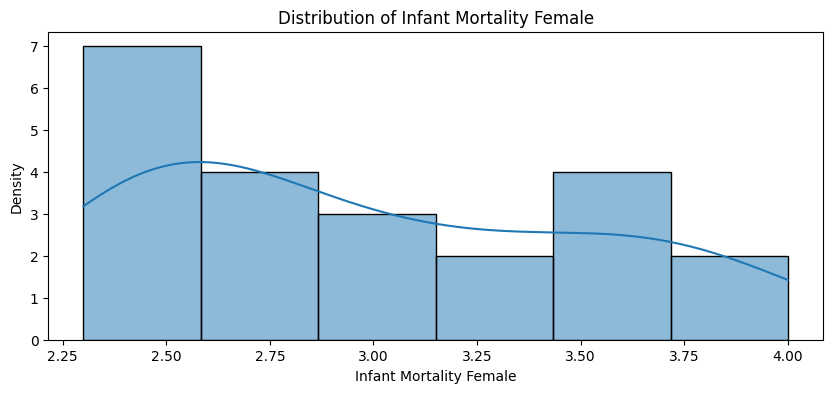

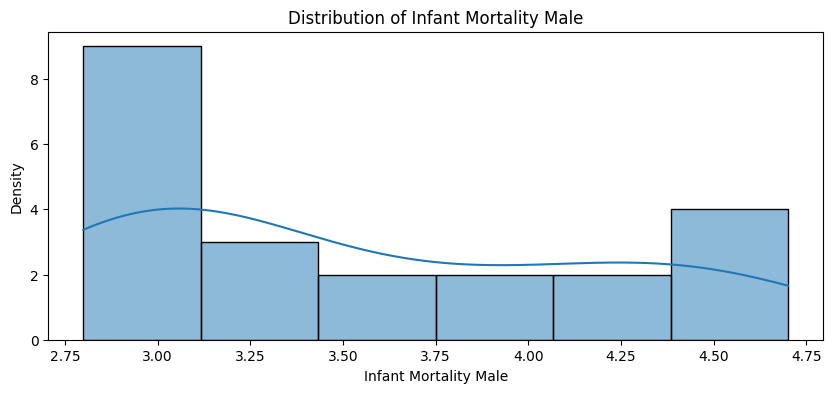

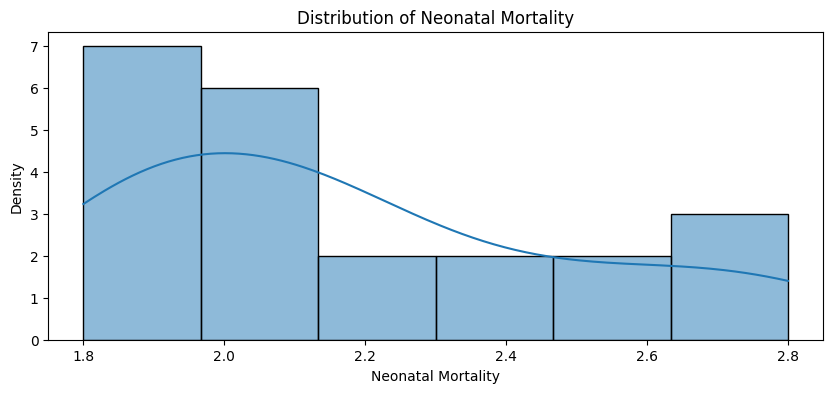

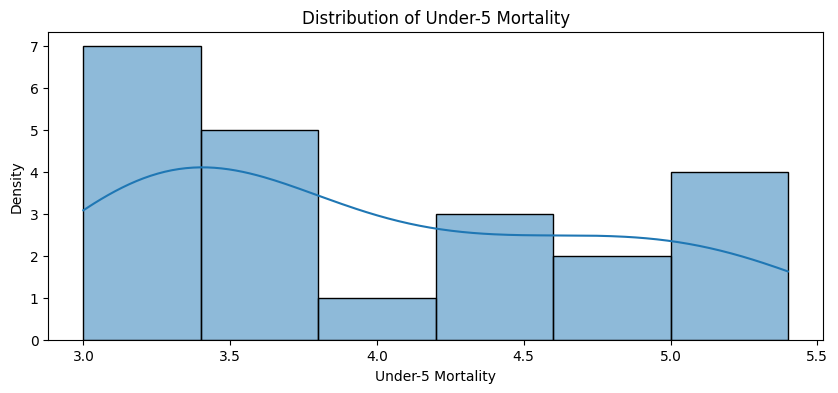

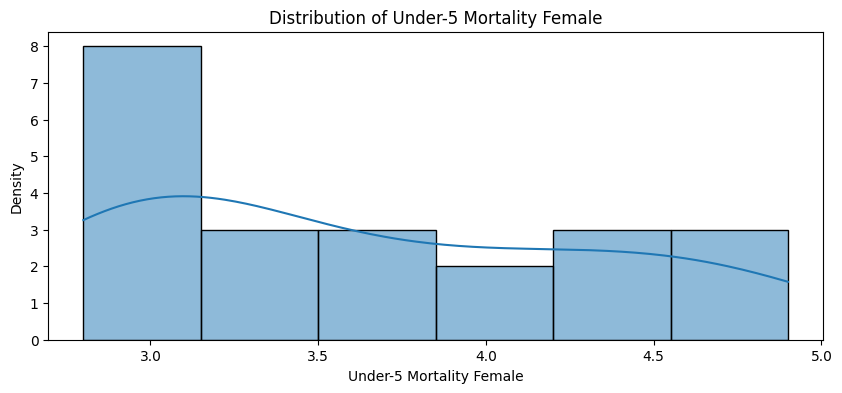

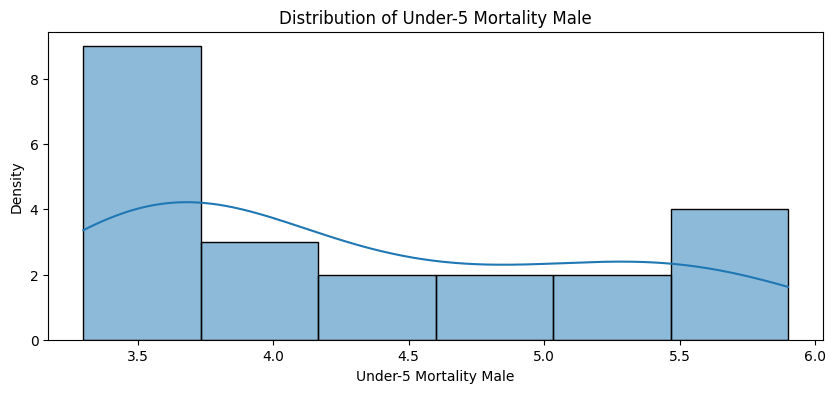

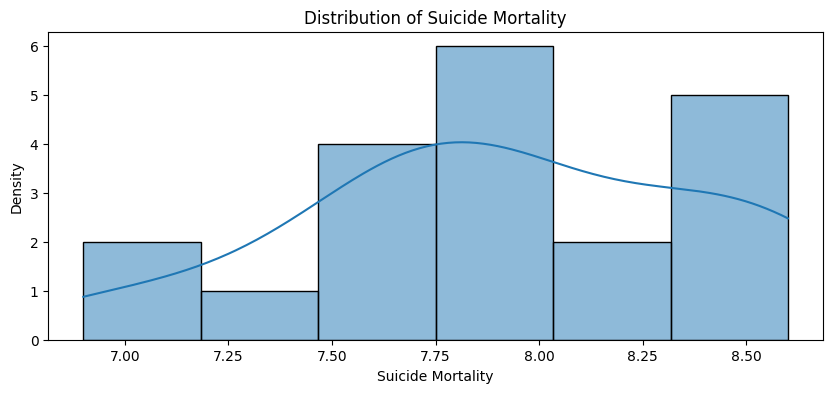

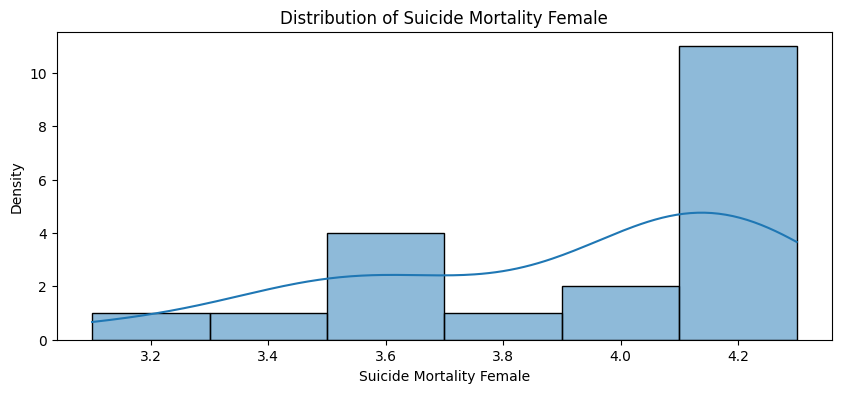

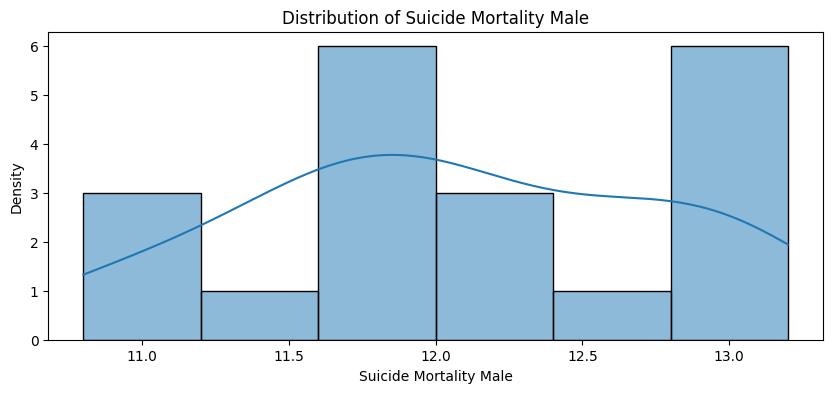

In [103]:

# Distribution of the Numerical Variable

# Loop through each column and create a distribution plot if it is of type float64
for column in pivot_df.columns:
    if pivot_df[column].dtype == 'float64':  # Check if the column is float64
        plt.figure(figsize=(10, 4))
        sns.histplot(pivot_df[column].dropna(), kde=True)  # Use histplot for distribution and kde for density curve
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

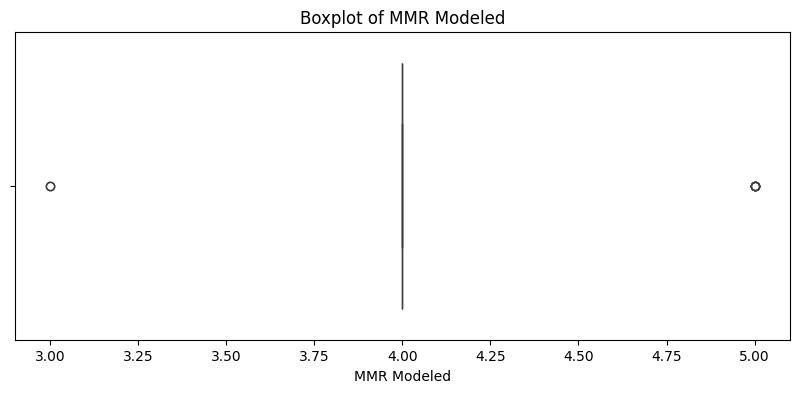

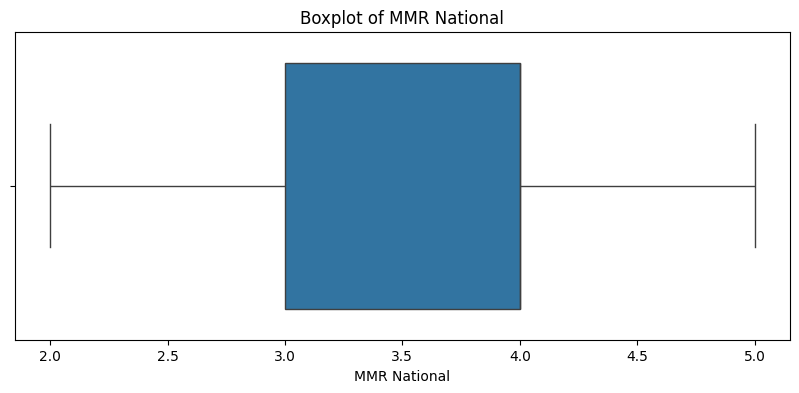

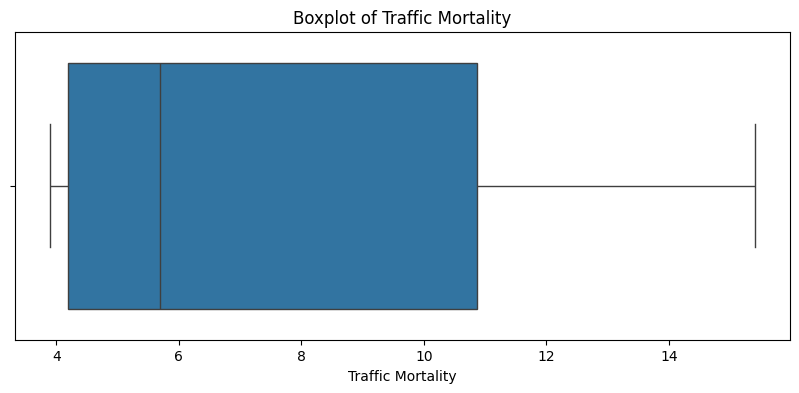

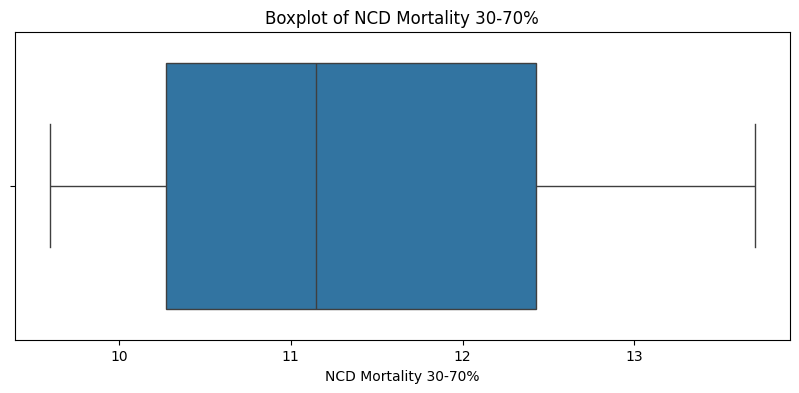

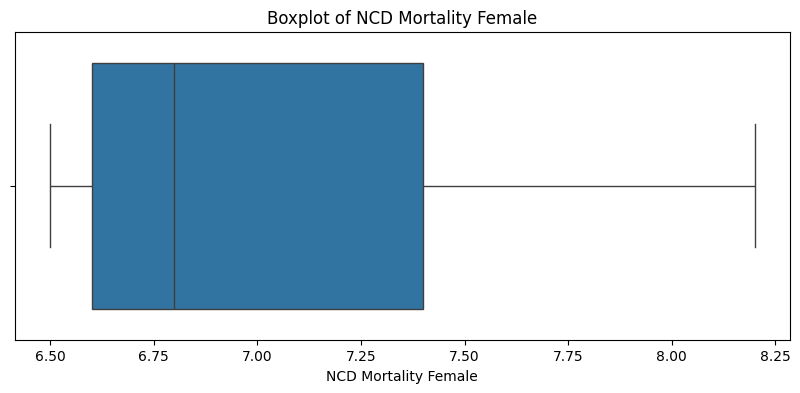

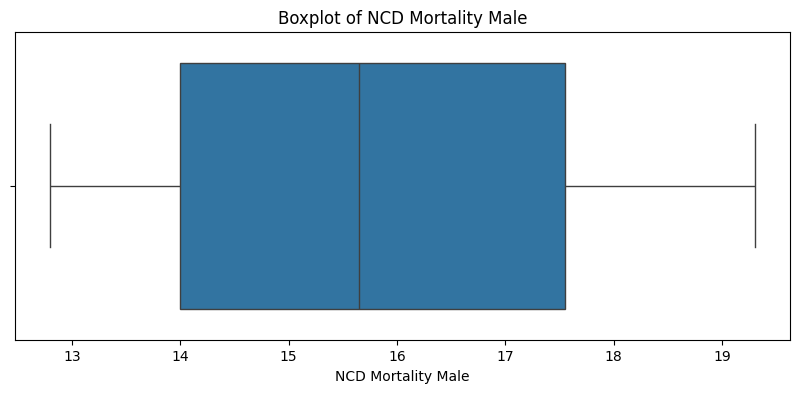

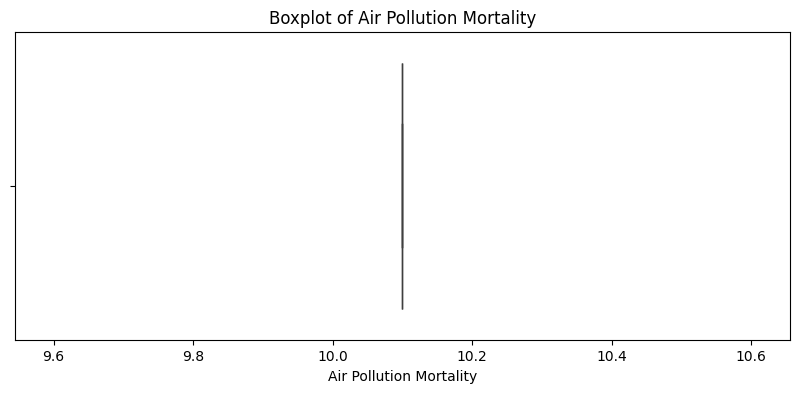

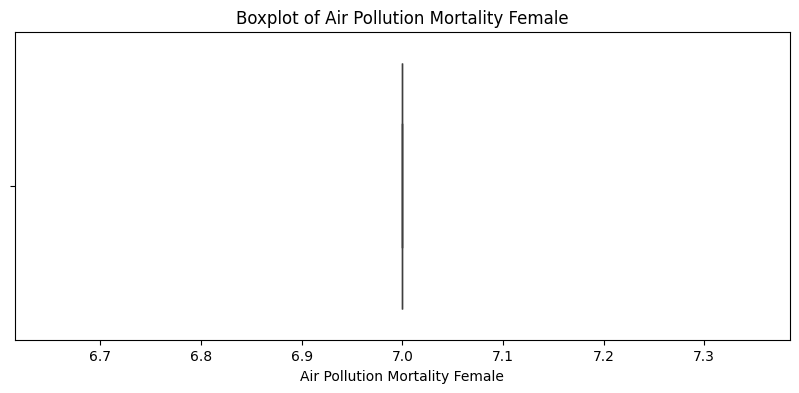

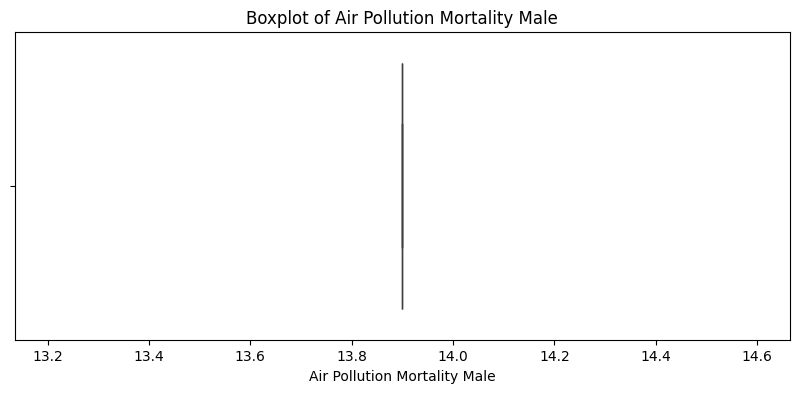

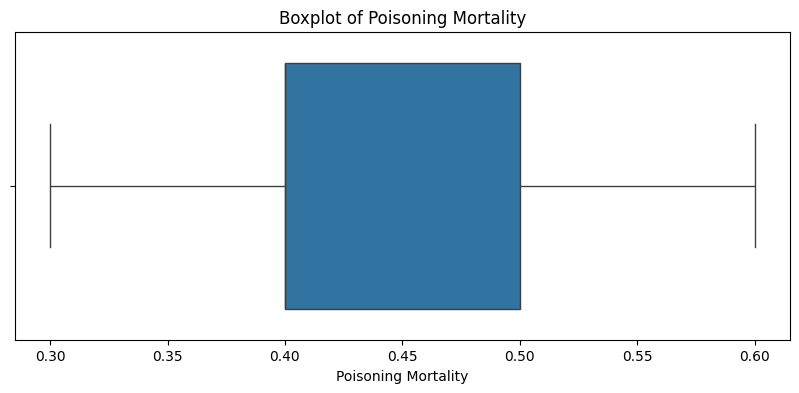

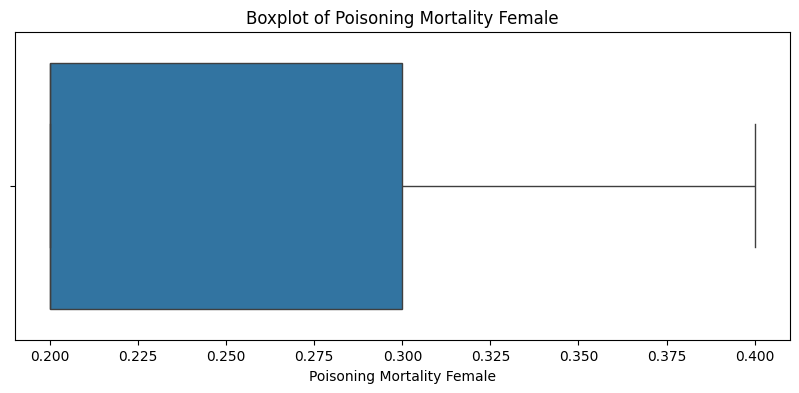

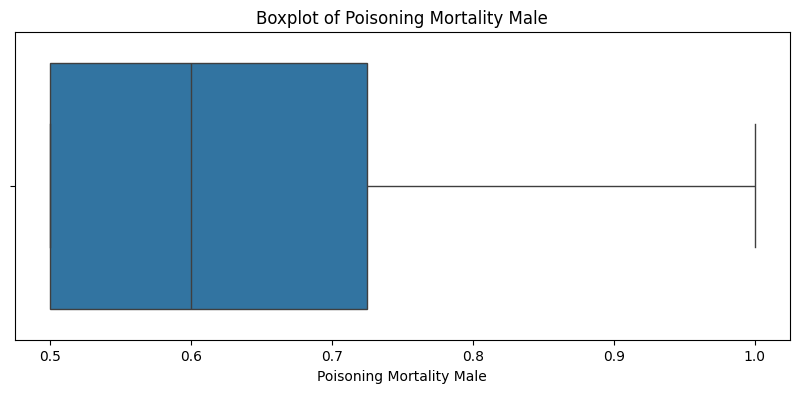

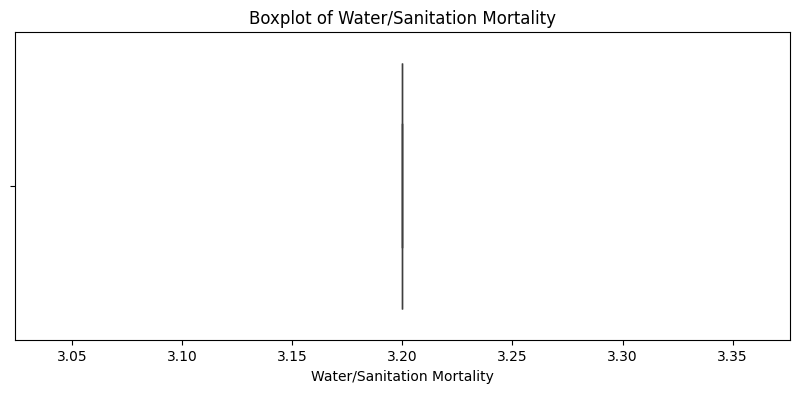

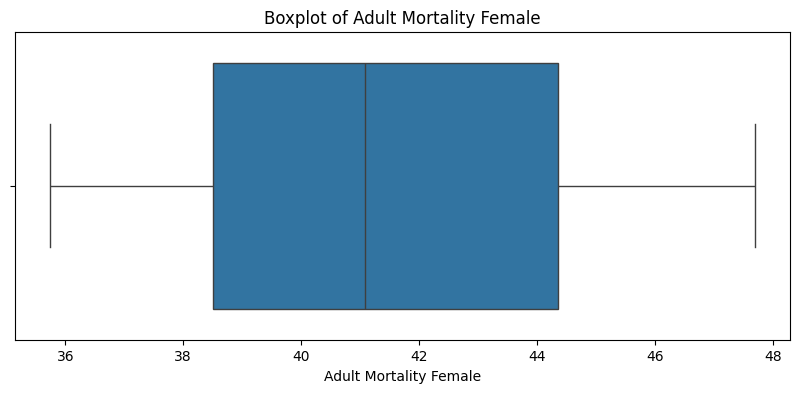

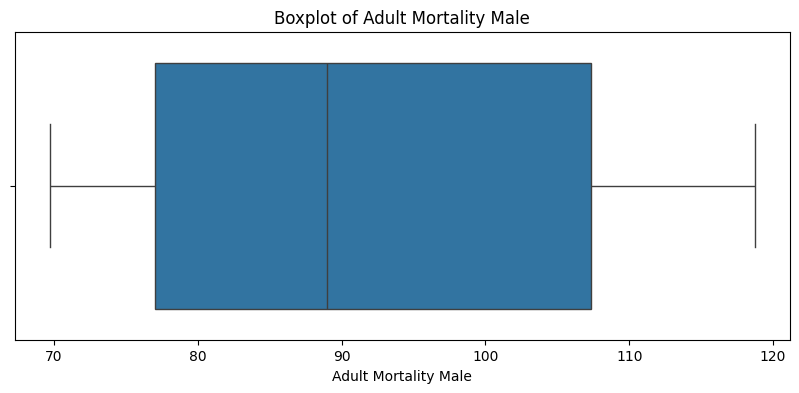

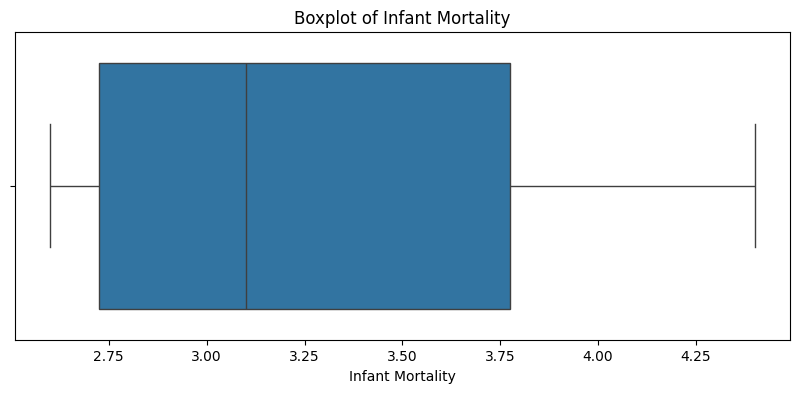

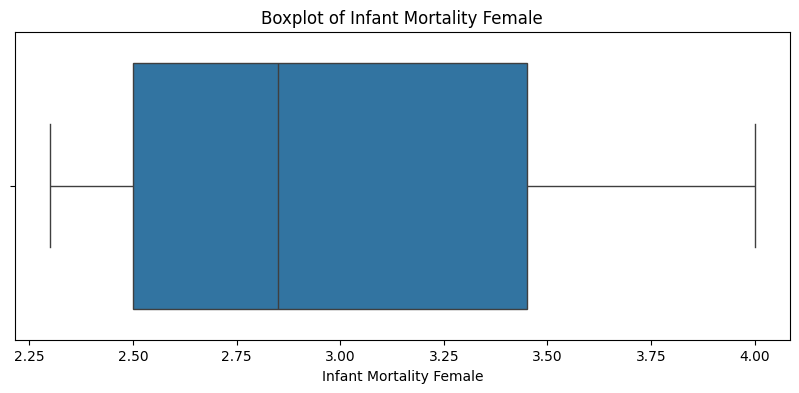

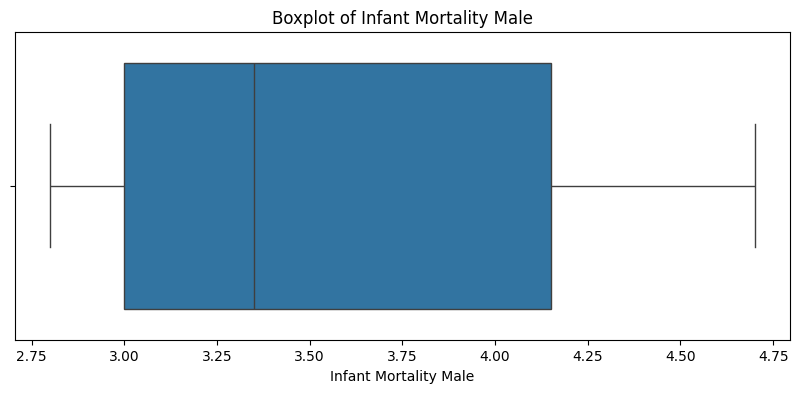

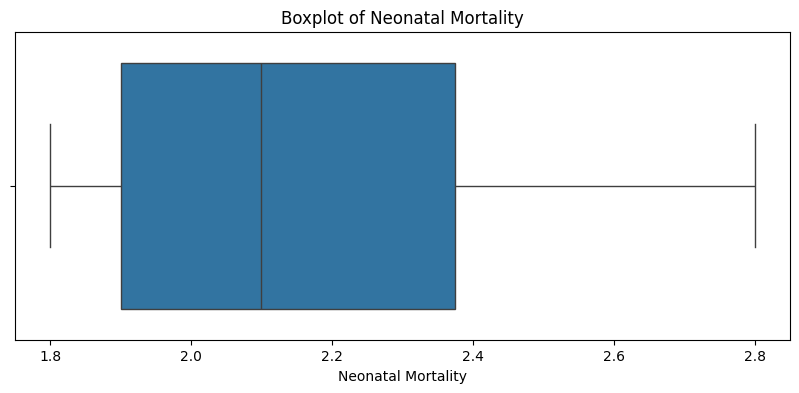

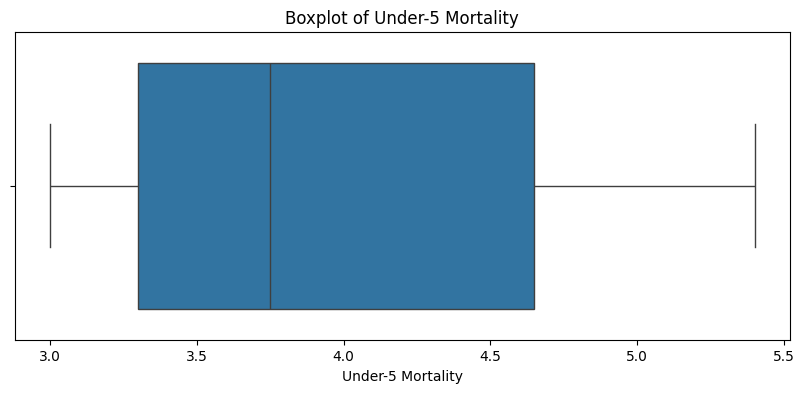

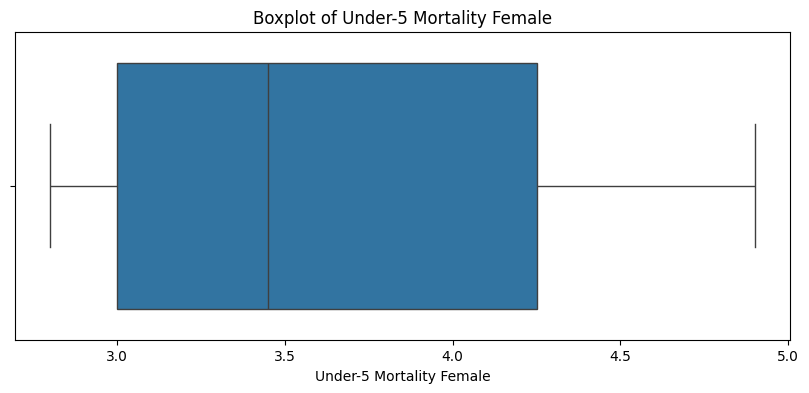

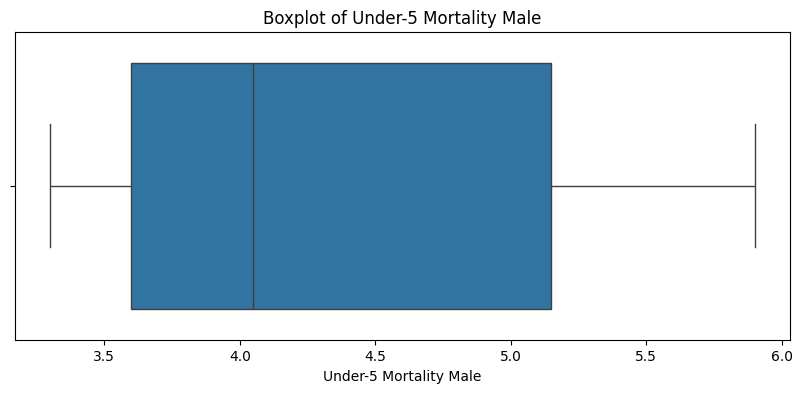

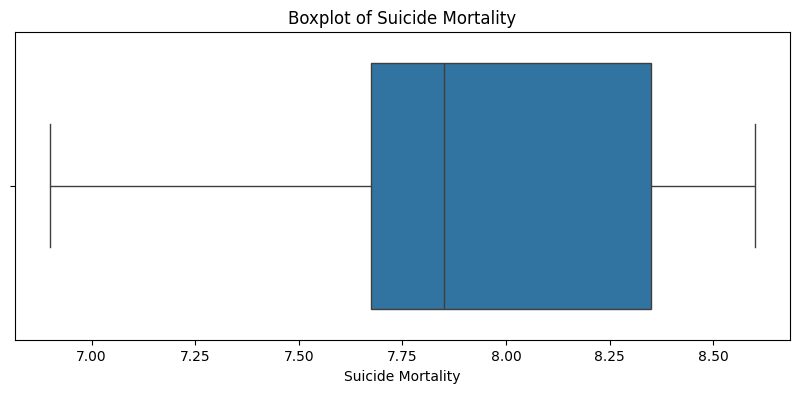

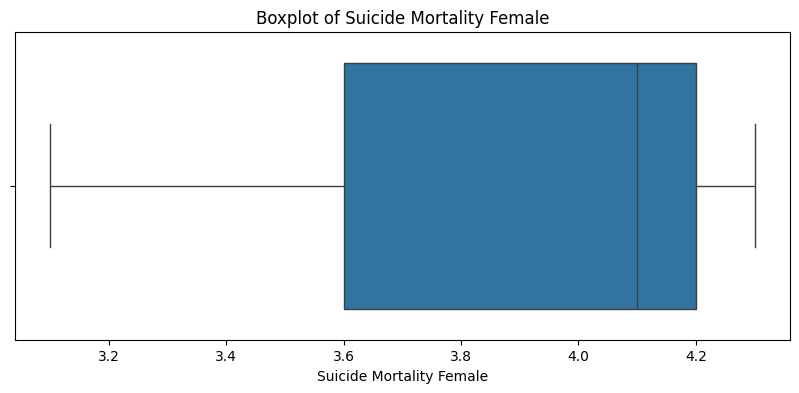

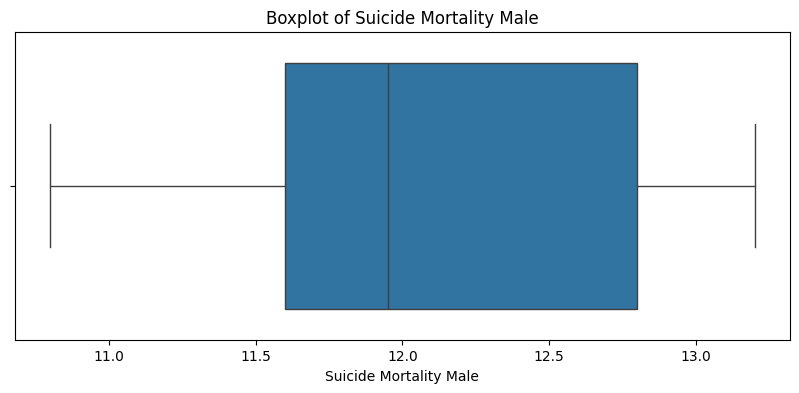

In [104]:

# Looking at the 

# Loop through each column and create a distribution plot if it is of type float64
for column in pivot_df.columns:
    if pivot_df[column].dtype == 'float64':  # Check if the column is float64
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=pivot_df[column].dropna())  # Drop NA values for the plot
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

Text(0.5, 1.0, 'Relationship between numerical variables')

<Figure size 1200x600 with 0 Axes>

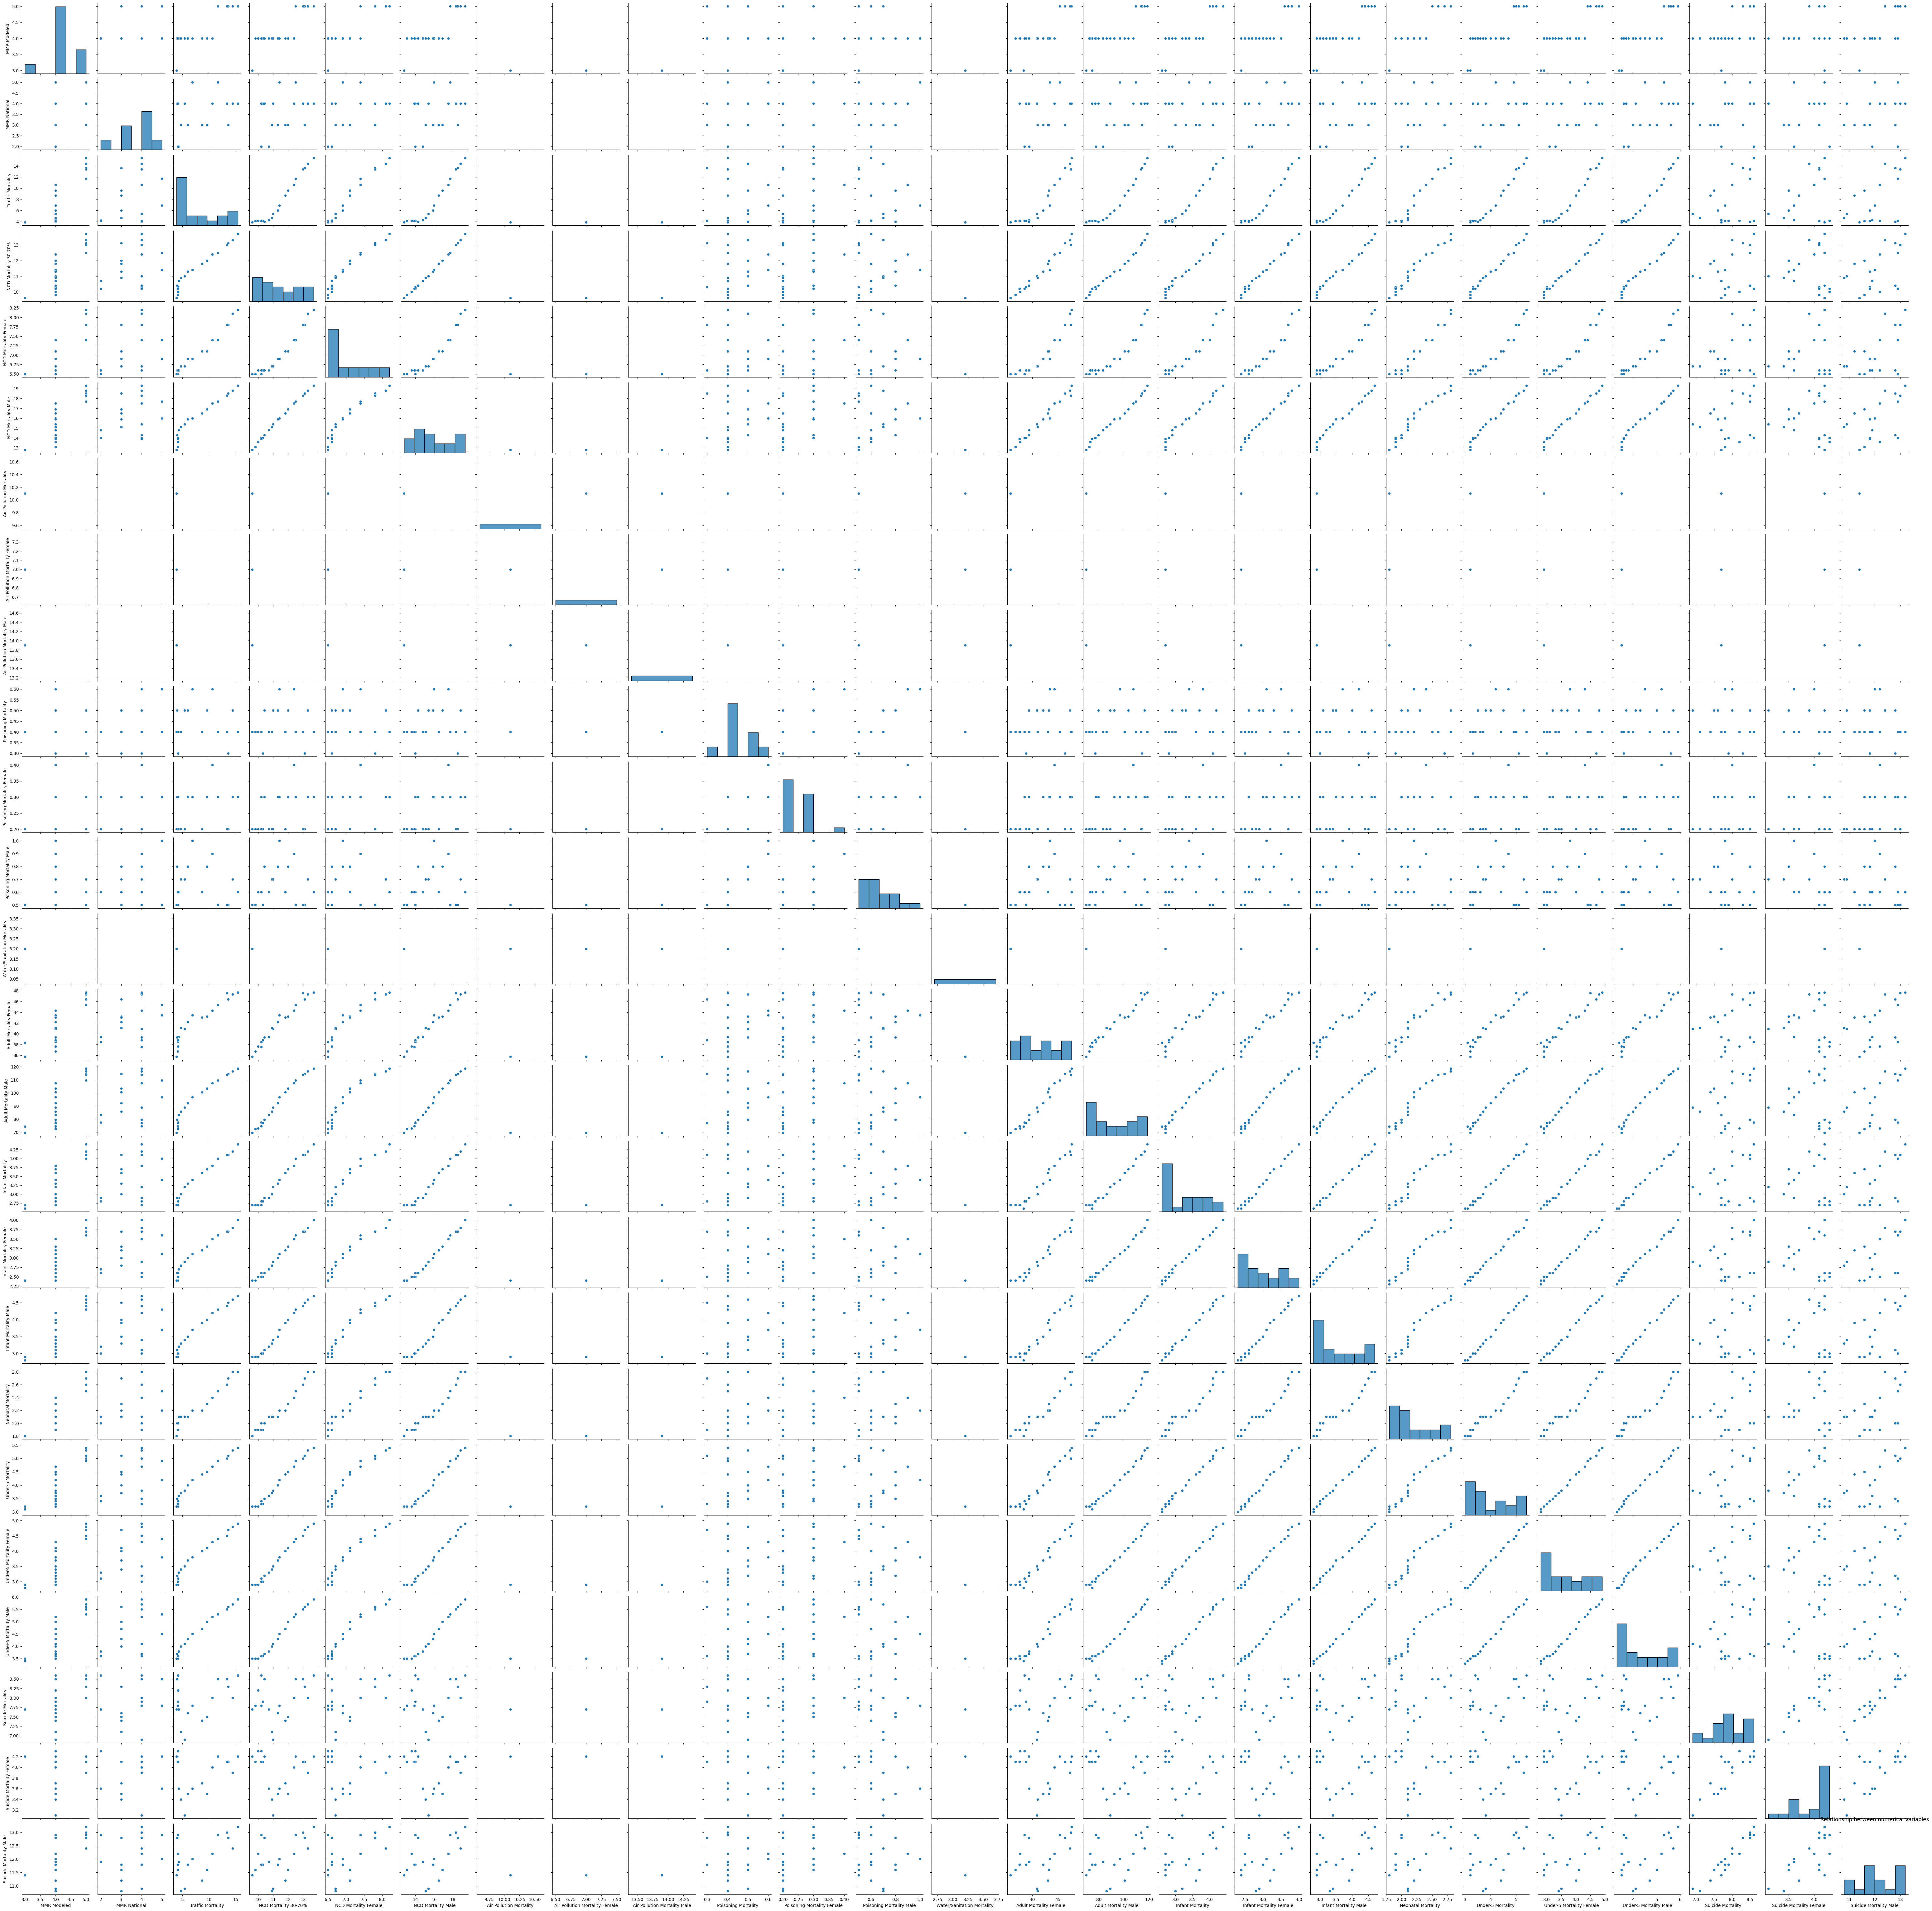

In [105]:


# Select all float columns, assuming 'Year' is not a float and thus automatically excluded
float_columns = pivot_df.select_dtypes(include=['float64'])

# Use Seaborn's pairplot function to create the pair plot
plt.figure(figsize=(12,6))
sns.pairplot(float_columns)
plt.title('Relationship between numerical variables')


In [186]:
# Melt the pivot_table for final restructuring based on Gender

# Filter 'NCD Mortality Female' and 'NCD Mortality Male'
male_female_ncdmortality = melted_df[melted_df['Metric'].isin(['NCD Mortality Male', 'NCD Mortality Female'])]

# Filter 'Air Pollution Mortality Female and 'Air Pollution Mortality Male'
male_female_airpollution = melted_df[melted_df['Metric'].isin(['Air Pollution Mortality Female','Air Pollution Mortality Male'])]

# Filter 'Poisoning Mortality Female' and 'Poisoning Mortality Male  '
male_female_poisoningmortality = melted_df[melted_df['Metric'].isin(['Poisoning Mortality Female','Poisoning Mortality Male'])]

# Filter 'Adult Mortality Female' and 'Adult Mortality Female'
male_female_adultmortality = melted_df[melted_df['Metric'].isin(['Adult Mortality Female','Adult Mortality Male'])]


#Filter 'Infant Mortality Female' and 'Infant Mortality Male'
male_female_infantmortality = melted_df[melted_df['Metric'].isin(['Infant Mortality Female', 'Infant Mortality Male'])]

# Filter 'Under -5 Mortality Female' and 'Under-5 Mortality Male'
male_female_under5mortality = melted_df[melted_df['Metric'].isin(['Under-5 Mortality Female', 'Under-5 Mortality Male'])]


# Filter 'Suicide Mortality Female' and 'Suicide Mortality Male'
male_female_suicidemortality = melted_df[melted_df['Metric'].isin(['Suicide Mortality Female','Suicide Mortality Male'])]


In [187]:
# Looking at a sample filtered data
male_female_adultmortality

Year                  Metric    Value
299  2000  Adult Mortality Female   47.685
300  2001  Adult Mortality Female   47.367
301  2002  Adult Mortality Female   46.403
302  2003  Adult Mortality Female   47.562
303  2004  Adult Mortality Female   45.381
304  2005  Adult Mortality Female   44.350
305  2006  Adult Mortality Female   43.231
306  2007  Adult Mortality Female   43.050
307  2008  Adult Mortality Female   43.440
308  2009  Adult Mortality Female   42.183
309  2010  Adult Mortality Female   40.911
310  2011  Adult Mortality Female   41.086
311  2012  Adult Mortality Female   39.432
312  2013  Adult Mortality Female   39.350
313  2014  Adult Mortality Female   38.499
314  2015  Adult Mortality Female   38.807
315  2016  Adult Mortality Female   37.537
316  2017  Adult Mortality Female   37.643
317  2018  Adult Mortality Female   36.720
318  2019  Adult Mortality Female   35.743
319  2020  Adult Mortality Female   38.335
320  2021  Adult Mortality Female      NaN
321  2022  Adult Mortality Female      NaN
322  2000    Adult Mortality Male  118.721
323  2001    Adult Mortality Male  116.551
324  2002    Adult Mortality Male  114.494
325  2003    Adult Mortality Male  113.835
326  2004    Adult Mortality Male  109.517
327  2005    Adult Mortality Male  107.352
328  2006    Adult Mortality Male  103.369
329  2007    Adult Mortality Male  100.531
330  2008    Adult Mortality Male   96.788
331  2009    Adult Mortality Male   92.228
332  2010    Adult Mortality Male   88.989
333  2011    Adult Mortality Male   85.896
334  2012    Adult Mortality Male   83.203
335  2013    Adult Mortality Male   79.558
336  2014    Adult Mortality Male   77.498
337  2015    Adult Mortality Male   76.998
338  2016    Adult Mortality Male   74.537
339  2017    Adult Mortality Male   73.061
340  2018    Adult Mortality Male   72.383
341  2019    Adult Mortality Male   69.721
342  2020    Adult Mortality Male   74.422
343  2021    Adult Mortality Male      NaN
344  2022    Adult Mortality Male      NaN

In [188]:
# Cleaned the filtered gender dfs 
# Extract Gender Male and Female indicator from each filtered df
male_female_ncdmortality['Metric'] = male_female_ncdmortality['Metric'].str.split(' ').str[-1]
male_female_airpollution['Metric'] = male_female_airpollution['Metric'].str.split(' ').str[-1]
male_female_poisoningmortality['Metric'] = male_female_poisoningmortality['Metric'].str.split(' ').str[-1]
male_female_adultmortality['Metric'] = male_female_adultmortality['Metric'].str.split(' ').str[-1]
male_female_infantmortality['Metric'] = male_female_infantmortality['Metric'].str.split(' ').str[-1]
male_female_under5mortality['Metric'] = male_female_under5mortality['Metric'].str.split(' ').str[-1]
male_female_suicidemortality['Metric'] = male_female_suicidemortality['Metric'].str.split(' ').str[-1]


C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\3420869395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_ncdmortality['Metric'] = male_female_ncdmortality['Metric'].str.split(' ').str[-1]
C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\3420869395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_airpollution['Metric'] = male_female_airpollution['Metric'].str.split(' ').str[-1]
C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\3420869395.py:5: SettingWithCopyWarning: 
A va

In [189]:
# Rename the metric column
male_female_ncdmortality.rename(columns={'Value': 'NCD Mortality_by_Gender'}, inplace=True)
male_female_airpollution.rename(columns={'Value': 'Air Pollution Mortality_byGender'}, inplace=True)
male_female_poisoningmortality.rename(columns={'Value': 'Poisoning Mortality_byGender'}, inplace=True)
male_female_adultmortality.rename(columns={'Value': 'Adult Mortality_byGender'}, inplace=True)
male_female_infantmortality.rename(columns={'Value': 'Infant Mortality_byGender'}, inplace=True)  # Fixed syntax error
male_female_under5mortality.rename(columns={'Value': 'Under 5 Mortality_byGender'}, inplace=True)
male_female_suicidemortality.rename(columns={'Value': 'Suicide Mortality_byGender'}, inplace=True)  # Made consistent with others


C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\2325159558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_ncdmortality.rename(columns={'Value': 'NCD Mortality_by_Gender'}, inplace=True)
C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\2325159558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_airpollution.rename(columns={'Value': 'Air Pollution Mortality_byGender'}, inplace=True)
C:\Users\chimi\AppData\Local\Temp\ipykernel_15968\2325159558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [190]:
# Dropping air pollution merge -it is leading to many missing values 
# Most of the dataset is empty for this column

In [191]:
# Preview of the column
# Merge 1
merged_df = pd.merge(male_female_ncdmortality, male_female_airpollution, on=['Metric', 'Year'], how='inner')

In [192]:
# Sequential merges with other DataFrames
# Merge 2
merged_df = pd.merge(merged_df, male_female_poisoningmortality, on=['Metric', 'Year'], how='inner')


In [193]:
# Merge 3
merged_df = pd.merge(merged_df, male_female_adultmortality, on=['Metric', 'Year'], how='inner')


In [194]:
# Merge 4
merged_df = pd.merge(merged_df, male_female_infantmortality, on=['Metric', 'Year'], how='inner')

In [195]:
# Merge 5
merged_df = pd.merge(merged_df, male_female_under5mortality, on=['Metric', 'Year'], how='inner')

In [196]:
# Merge 6
merged_df = pd.merge(merged_df, male_female_suicidemortality, on=['Metric', 'Year'], how='inner')

# merged_df now contains all the merged data
merged_df

Year  Metric  NCD Mortality_by_Gender  Air Pollution Mortality_byGender  \
0   2000  Female                      8.2                               NaN   
1   2001  Female                      8.1                               NaN   
2   2002  Female                      7.8                               NaN   
3   2003  Female                      7.8                               NaN   
4   2004  Female                      7.4                               NaN   
5   2005  Female                      7.4                               NaN   
6   2006  Female                      7.1                               NaN   
7   2007  Female                      7.1                               NaN   
8   2008  Female                      6.9                               NaN   
9   2009  Female                      6.9                               NaN   
10  2010  Female                      6.7                               NaN   
11  2011  Female                      6.7                               NaN   
12  2012  Female                      6.6                               NaN   
13  2013  Female                      6.6                               NaN   
14  2014  Female                      6.5                               NaN   
15  2015  Female                      6.6                               NaN   
16  2016  Female                      6.6                               NaN   
17  2017  Female                      6.6                               NaN   
18  2018  Female                      6.5                               NaN   
19  2019  Female                      6.5                               7.0   
20  2020  Female                      NaN                               NaN   
21  2021  Female                      NaN                               NaN   
22  2022  Female                      NaN                               NaN   
23  2000    Male                     19.3                               NaN   
24  2001    Male                     18.8                               NaN   
25  2002    Male                     18.5                               NaN   
26  2003    Male                     18.3                               NaN   
27  2004    Male                     17.7                               NaN   
28  2005    Male                     17.5                               NaN   
29  2006    Male                     16.9                               NaN   
30  2007    Male                     16.5                               NaN   
31  2008    Male                     16.0                               NaN   
32  2009    Male                     15.9                               NaN   
33  2010    Male                     15.4                               NaN   
34  2011    Male                     15.1                               NaN   
35  2012    Male                     14.8                               NaN   
36  2013    Male                     14.3                               NaN   
37  2014    Male                     14.0                               NaN   
38  2015    Male                     14.0                               NaN   
39  2016    Male                     13.9                               NaN   
40  2017    Male                     13.6                               NaN   
41  2018    Male                     13.1                               NaN   
42  2019    Male                     12.8                              13.9   
43  2020    Male                      NaN                               NaN   
44  2021    Male                      NaN                               NaN   
45  2022    Male                      NaN                               NaN   

    Poisoning Mortality_byGender  Adult Mortality_byGender  \
0                            0.3                    47.685   
1                            0.3                    47.367   
2                            0.2                    46.403   
3                            0.2          

In [197]:
# Rename the column 'Metric'
merged_df.rename(columns={'Metric':'Gender'}, inplace=True)

In [198]:
merged_df['Gender'].value_counts()

Gender
Female    23
Male      23
Name: count, dtype: int64

In [199]:
# 
# Correct the typo in the column name for clarity
lifeinsurance_df.rename(columns={'Effecitive_Date': 'Effective_Date'}, inplace=True)

# Extract the year from the Effective_Date column
lifeinsurance_df['Year'] = lifeinsurance_df['Effective_Date'].dt.year


In [200]:
# Replace Male and Female with prefix 'M' and 'F'
merged_df['Gender'] = merged_df['Gender'].replace({'Male': 'M', 'Female': 'F'})


In [201]:
merged_df['Gender'].value_counts()

Gender
F    23
M    23
Name: count, dtype: int64

In [202]:
# Merge the Excel DataFrame with the CSV dataframe based on the Year and Gender column
final_merged_df = pd.merge(lifeinsurance_df, merged_df, on=['Year','Gender'])

In [203]:
final_merged_df

ID Gender Birth_Date Effective_Date   Capital Renewal_Date  \
0          1      M 1960-07-10     2000-03-08   55000.0   2009-03-08   
1          2      M 1961-08-18     2000-03-07  105000.0   2009-03-07   
2          3      M 1963-10-14     2000-03-15   79500.0   2009-03-15   
3          4      F 1966-06-26     2000-03-15   74500.0   2009-03-15   
4          5      M 1942-09-30     2000-03-07  140000.0   2009-03-07   
...      ...    ...        ...            ...       ...          ...   
76097  76098      F 1964-08-01     2008-06-18   95000.0   2009-06-18   
76098  76099      F 1965-09-13     2005-09-07   45000.0   2009-09-07   
76099  76100      F 1968-09-21     2009-02-12  103000.0   2009-02-12   
76100  76101      F 1966-12-17     2002-11-14   82000.0   2009-11-14   
76101  76102      F 1958-01-20     2007-04-30  217000.0   2009-04-30   

             Age         t  Age_Actuarial   Birthday  ...  \
0      48.659822  0.659822             49 2009-07-10  ...   
1      47.550992  0.550992             48 2009-08-18  ...   
2      45.418207  0.418207             45 2009-10-14  ...   
3      42.718686  0.718686             43 2009-06-26  ...   
4      66.433949  0.433949             66 2009-09-30  ...   
...          ...       ...            ...        ...  ...   
76097  44.878850  0.878850             45 2009-08-01  ...   
76098  43.983573  0.983573             44 2009-09-13  ...   
76099  40.394251  0.394251             40 2009-09-21  ...   
76100  42.910335  0.910335             43 2009-12-17  ...   
76101  51.274470  0.274470             51 2009-01-20  ...   

       Age_actuarial_quarter  Month  Year  NCD Mortality_by_Gender  \
0                      48.75      3  2000                     19.3   
1                      47.50      3  2000                     19.3   
2                      45.50      3  2000                     19.3   
3                      42.75      3  2000                      8.2   
4                      66.50      3  2000                     19.3   
...                      ...    ...   ...                      ...   
76097                  44.00      6  2008                      6.9   
76098                  43.00      9  2005                      7.4   
76099                  40.50      2  2009                      6.9   
76100                  42.00     11  2002                      7.8   
76101                  51.25      4  2007                      7.1   

       Air Pollution Mortality_byGender  Poisoning Mortality_byGender  \
0                                   NaN                           0.6   
1                                   NaN                           0.6   
2                                   NaN                           0.6   
3                                   NaN                           0.3   
4                                   NaN                           0.6   
...                                 ...                           ...   
76097                               NaN                           0.3   
76098                               NaN                           0.4   
76099                               NaN                           0.3   
76100                               NaN                           0.2   
76101                               NaN                           0.2   

       Adult Mortality_byGender  Infant Mortality_byGender  \
0                       118.721                        4.7   
1                       118.721                        4.7   
2                       118.721                        4.7   
3                        47.685                        4.0   
4                       118.721                        4.7   
...                         ...                        ...   
76097                    43.440                        3.1   
76098                    44.350                        3.5   
76099                    42.183                        3.0   
76100                    46.403                        3.7   
76101       

In [204]:
final_merged_df.columns

Index(['ID', 'Gender', 'Birth_Date', 'Effective_Date', 'Capital',
       'Renewal_Date', 'Age', 't', 'Age_Actuarial', 'Birthday', 'x', 'r', 's',
       'Age_actuarial_quarter', 'Month', 'Year', 'NCD Mortality_by_Gender',
       'Air Pollution Mortality_byGender', 'Poisoning Mortality_byGender',
       'Adult Mortality_byGender', 'Infant Mortality_byGender',
       'Under 5 Mortality_byGender', 'Suicide Mortality_byGender'],
      dtype='object')

In [205]:
final_merged_df.isnull().sum()

ID                                      0
Gender                                  0
Birth_Date                              0
Effective_Date                          0
Capital                                 0
Renewal_Date                            0
Age                                     0
t                                       0
Age_Actuarial                           0
Birthday                                0
x                                       0
r                                       0
s                                       0
Age_actuarial_quarter                   0
Month                                   0
Year                                    0
NCD Mortality_by_Gender                 0
Air Pollution Mortality_byGender    76102
Poisoning Mortality_byGender            0
Adult Mortality_byGender                0
Infant Mortality_byGender               0
Under 5 Mortality_byGender              0
Suicide Mortality_byGender              0
dtype: int64

In [206]:
# Drop the 'NCD  Mortality by Gender' columns for its missing values
final_merged_df.drop('NCD Mortality_by_Gender', axis=1, inplace=True)

In [208]:
# Check for duplicates
final_merged_df.duplicated().sum()

0

In [209]:
# Save the final file as a csv file
final_merged_df.to_csv('final_merged_df.csv', index=False)

In [210]:
final_merged_df

ID Gender Birth_Date Effective_Date   Capital Renewal_Date  \
0          1      M 1960-07-10     2000-03-08   55000.0   2009-03-08   
1          2      M 1961-08-18     2000-03-07  105000.0   2009-03-07   
2          3      M 1963-10-14     2000-03-15   79500.0   2009-03-15   
3          4      F 1966-06-26     2000-03-15   74500.0   2009-03-15   
4          5      M 1942-09-30     2000-03-07  140000.0   2009-03-07   
...      ...    ...        ...            ...       ...          ...   
76097  76098      F 1964-08-01     2008-06-18   95000.0   2009-06-18   
76098  76099      F 1965-09-13     2005-09-07   45000.0   2009-09-07   
76099  76100      F 1968-09-21     2009-02-12  103000.0   2009-02-12   
76100  76101      F 1966-12-17     2002-11-14   82000.0   2009-11-14   
76101  76102      F 1958-01-20     2007-04-30  217000.0   2009-04-30   

             Age         t  Age_Actuarial   Birthday  ...  s  \
0      48.659822  0.659822             49 2009-07-10  ...  1   
1      47.550992  0.550992             48 2009-08-18  ...  1   
2      45.418207  0.418207             45 2009-10-14  ...  1   
3      42.718686  0.718686             43 2009-06-26  ...  1   
4      66.433949  0.433949             66 2009-09-30  ...  1   
...          ...       ...            ...        ...  ... ..   
76097  44.878850  0.878850             45 2009-08-01  ...  2   
76098  43.983573  0.983573             44 2009-09-13  ...  3   
76099  40.394251  0.394251             40 2009-09-21  ...  1   
76100  42.910335  0.910335             43 2009-12-17  ...  4   
76101  51.274470  0.274470             51 2009-01-20  ...  2   

       Age_actuarial_quarter  Month  Year  Air Pollution Mortality_byGender  \
0                      48.75      3  2000                               NaN   
1                      47.50      3  2000                               NaN   
2                      45.50      3  2000                               NaN   
3                      42.75      3  2000                               NaN   
4                      66.50      3  2000                               NaN   
...                      ...    ...   ...                               ...   
76097                  44.00      6  2008                               NaN   
76098                  43.00      9  2005                               NaN   
76099                  40.50      2  2009                               NaN   
76100                  42.00     11  2002                               NaN   
76101                  51.25      4  2007                               NaN   

       Poisoning Mortality_byGender  Adult Mortality_byGender  \
0                               0.6                   118.721   
1                               0.6                   118.721   
2                               0.6                   118.721   
3                               0.3                    47.685   
4                               0.6                   118.721   
...                             ...                       ...   
76097                           0.3                    43.440   
76098                           0.4                    44.350   
76099                           0.3                    42.183   
76100                           0.2                    46.403   
76101                           0.2                    43.050   

       Infant Mortality_byGender  Under 5 Mortality_byGender  \
0                            4.7                         5.9   
1                            4.7                         5.9   
2                            4.7                         5.9   
3                            4.0                         4.9   
4                            4.7                         5.9   
...                          ...                         ...   
76097                        3.1                         3.8   
76098                        3.5                         4.3   
76099                        3.0                         3.7   
76100 